# **Earthquake Damage Prediction**

### **Domain Analysis - Earthquake damage prediction**

    Gorkha Earthquake (2015)
The Gorkha earthquake, also known as the Nepal earthquake, struck Nepal on April 25, 2015, with a magnitude of 7.8.  Its epicenter was east of Gorkha District at Barpak, Gorkha, roughly 85 km (53 mi) northwest of central Kathmandu. This devastating earthquake claimed the lives of 9,000 people and left 22,309 others injured.



### **Problem Statements:**
> Predicting Building Damage Grade from the 2015 Gorkha Earthquake in Nepal.

In this project, our goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal. The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

**Objective:**
The specific task is to predict the ordinal variable damage_grade, which categorizes the extent of damage to a building into three grades:

Grade 1: Represents low damage

Grade 2: Represents a moderate amount of damage

Grade 3: Represents almost complete destruction

### **Dataset Overview**

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

**Description**
- geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

- count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
- age (type: int): age of the building in years.
- area_percentage (type: int): normalized area of the building footprint.
- height_percentage (type: int): normalized height of the building footprint.
- land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
- ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- position (type: categorical): position of the building. Possible values: j, o, s, t.
- plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
- has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
- has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
- legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- count_families (type: int): number of families that live in the building.
- has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
- has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
- has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
- has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
- has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
- has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
- has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
- has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
- has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

### **Important Libraries**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None) # for seeing all columns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
import time
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix

from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier



### **Read Dataset**

In [2]:
train_lables = pd.read_csv("D:/Internship/Rubixe/Earthquake-Damage-Prediction/Dataset/train_labels.csv")
train_values = pd.read_csv("D:/Internship/Rubixe/Earthquake-Damage-Prediction/Dataset/train_values.csv")

In [3]:
train_lables.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [4]:
train_values.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

In [5]:
# merge both dataframe
df = pd.merge(train_lables, train_values, on="building_id", how="inner")

In [6]:
df.head()

building_id  damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906             3               6             487           12198   
1        28830             2               8             900            2812   
2        94947             3              21             363            8973   
3       590882             2              22             418           10694   
4       201944             3              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0  

### **Basic checks**

In [7]:
df.shape

(260601, 40)

There are total 260601 rows and 40 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

There are total 8 categorical and 32 numerical columns

In [9]:
df.dtypes

building_id                                int64
damage_grade                               int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_m

In [10]:
df.describe().T

count           mean  \
building_id                             260601.0  525675.482773   
damage_grade                            260601.0       2.238272   
geo_level_1_id                          260601.0      13.900353   
geo_level_2_id                          260601.0     701.074685   
geo_level_3_id                          260601.0    6257.876148   
count_floors_pre_eq                     260601.0       2.129723   
age                                     260601.0      26.535029   
area_percentage                         260601.0       8.018051   
height_percentage                       260601.0       5.434365   
has_superstructure_adobe_mud            260601.0       0.088645   
has_superstructure_mud_mortar_stone     260601.0       0.761935   
has_superstructure_stone_flag           260601.0       0.034332   
has_superstructure_cement_mortar_stone  260601.0       0.018235   
has_superstructure_mud_mortar_brick     260601.0       0.068154   
has_superstructure_cement_mortar_brick  260601.0       0.075268   
has_superstructure_timber               260601.0       0.254988   
has_superstructure_bamboo               260601.0       0.085011   
has_superstructure_rc_non_engineered    260601.0       0.042590   
has_superstructure_rc_engineered        260601.0       0.015859   
has_superstructure_other                260601.0       0.014985   
count_families                          260601.0       0.983949   
has_secondary_use                       260601.0       0.111880   
has_secondary_use_agriculture           260601.0       0.064378   
has_secondary_use_hotel                 260601.0       0.033626   
has_secondary_use_rental                260601.0       0.008101   
has_secondary_use_institution           260601.0       0.000940   
has_secondary_use_school                260601.0       0.000361   
has_secondary_use_industry              260601.0       0.001071   
has_secondary_use_health_post           260601.0       0.000188   
has_secondary_use_gov_office            260601.0       0.000146   
has_secondary_use_use_police            260601.0       0.000088   
has_secondary_use_other                 260601.0       0.005119   

                                                  std  min       25%  \
building_id                             304544.999032  4.0  261190.0   
damage_grade                                 0.611814  1.0       2.0   
geo_level_1_id                               8.033617  0.0       7.0   
geo_level_2_id                             412.710734  0.0     350.0   
geo_level_3_id                            3646.369645  0.0    3073.0   
count_floors_pre_eq                          0.727665  1.0       2.0   
age                                         73.565937  0.0      10.0   
area_percentage                              4.392231  1.0       5.0   
height_percentage                            1.918418  2.0       4.0   
has_superstructure_adobe_mud                 0.284231  0.0       0.0   
has_superstructure_mud_mortar_stone          0.425900  0.0       1.0   
has_superstructure_stone_flag                0.182081  0.0       0.0   
has_superstructure_cement_mortar_stone       0.133800  0.0       0.0   
has_superstructure_mud_mortar_brick          0.252010  0.0       0.0   
has_superstructure_cement_mortar_brick       0.263824  0.0       0.0   
has_superstructure_timber                    0.435855  0.0       0.0   
has_superstructure_bamboo                    0.278899  0.0       0.0   
has_superstructure_rc_non_engineered         0.201931  0.0       0.0   
has_superstructure_rc_engineered             0.124932  0.0       0.0   
has_superstructure_other                     0.121491  0.0       0.0   
count_families                               0.418389  0.0       1.0   
has_secondary_use                            0.315219  0.0       0.0   
has_secondary_use_agriculture                0.245426  0.0       0.0   
has_secondary_use_hotel                      0.180265  0.0       0.0   
has_secondary_use_rental       

In [11]:
df.describe(include="O").T

count unique top    freq
land_surface_condition  260601      3   t  216757
foundation_type         260601      5   r  219196
roof_type               260601      3   n  182842
ground_floor_type       260601      5   f  209619
other_floor_type        260601      4   q  165282
position                260601      4   s  202090
plan_configuration      260601     10   d  250072
legal_ownership_status  260601      4   v  250939

In [12]:
df.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

There is no null values

In [13]:
df.duplicated().sum()

0

There is no duplicate rows

In [14]:
# create a list for categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.to_list()
categorical_columns

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [15]:
# create a list for numerical columns
numerical_coulmns = df.select_dtypes(include=["int"]).columns.to_list()
numerical_coulmns

['building_id',
 'damage_grade',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [16]:
df.nunique()

building_id                               260601
damage_grade                                   3
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_m

Checking unique values in Categorical columns

In [17]:
for col in categorical_columns:
    unique_value = df[col].unique()
    print("Unique values in: ", col)
    print(unique_value)


Unique values in:  land_surface_condition
['t' 'o' 'n']
Unique values in:  foundation_type
['r' 'w' 'i' 'u' 'h']
Unique values in:  roof_type
['n' 'q' 'x']
Unique values in:  ground_floor_type
['f' 'x' 'v' 'z' 'm']
Unique values in:  other_floor_type
['q' 'x' 'j' 's']
Unique values in:  position
['t' 's' 'j' 'o']
Unique values in:  plan_configuration
['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
Unique values in:  legal_ownership_status
['v' 'a' 'r' 'w']


Checking unique values in Numerical columns

In [18]:
for col in numerical_coulmns:
    unique_value = df[col].unique()
    print("Unique values in: ", col)
    print(unique_value)
    print("=========")

Unique values in:  building_id
[802906  28830  94947 ... 602512 151409 747594]
Unique values in:  damage_grade
[3 2 1]
Unique values in:  geo_level_1_id
[ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
Unique values in:  geo_level_2_id
[487 900 363 ...  77 115 627]
Unique values in:  geo_level_3_id
[12198  2812  8973 ...  3152  5276  3085]
Unique values in:  count_floors_pre_eq
[2 3 1 4 5 6 7 8 9]
Unique values in:  age
[ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
Unique values in:  area_percentage
[  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67  66  54  75  65  58  48  64  63  46  59  86  78  41  44  61  70  77
  73  72  53  60  84  83  76  

### **Exploratery Data Analysis**

#### 1. Univariate analysis 

For category columns

In [19]:
category_columns = ['land_surface_condition', 'foundation_type','roof_type', 'ground_floor_type','other_floor_type', 
                    'position','damage_grade', 'plan_configuration', 'legal_ownership_status', 'has_superstructure_adobe_mud',
                    'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',
                    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
                    'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
                    'has_superstructure_other', 'count_families', 'has_secondary_use','has_secondary_use_agriculture',
                    'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution','has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police',
                    'has_secondary_use_other'
                    ]

In [20]:
len(category_columns)

32

In [21]:
for col in category_columns:
    unique_value = df[col].value_counts()
    print("Unique values in: ", col)
    print(unique_value)
    print("=========")

Unique values in:  land_surface_condition
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
Unique values in:  foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
Unique values in:  roof_type
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
Unique values in:  ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
Unique values in:  other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
Unique values in:  position
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
Unique values in:  damage_grade
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64
Unique values in:  plan_configuration
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: 

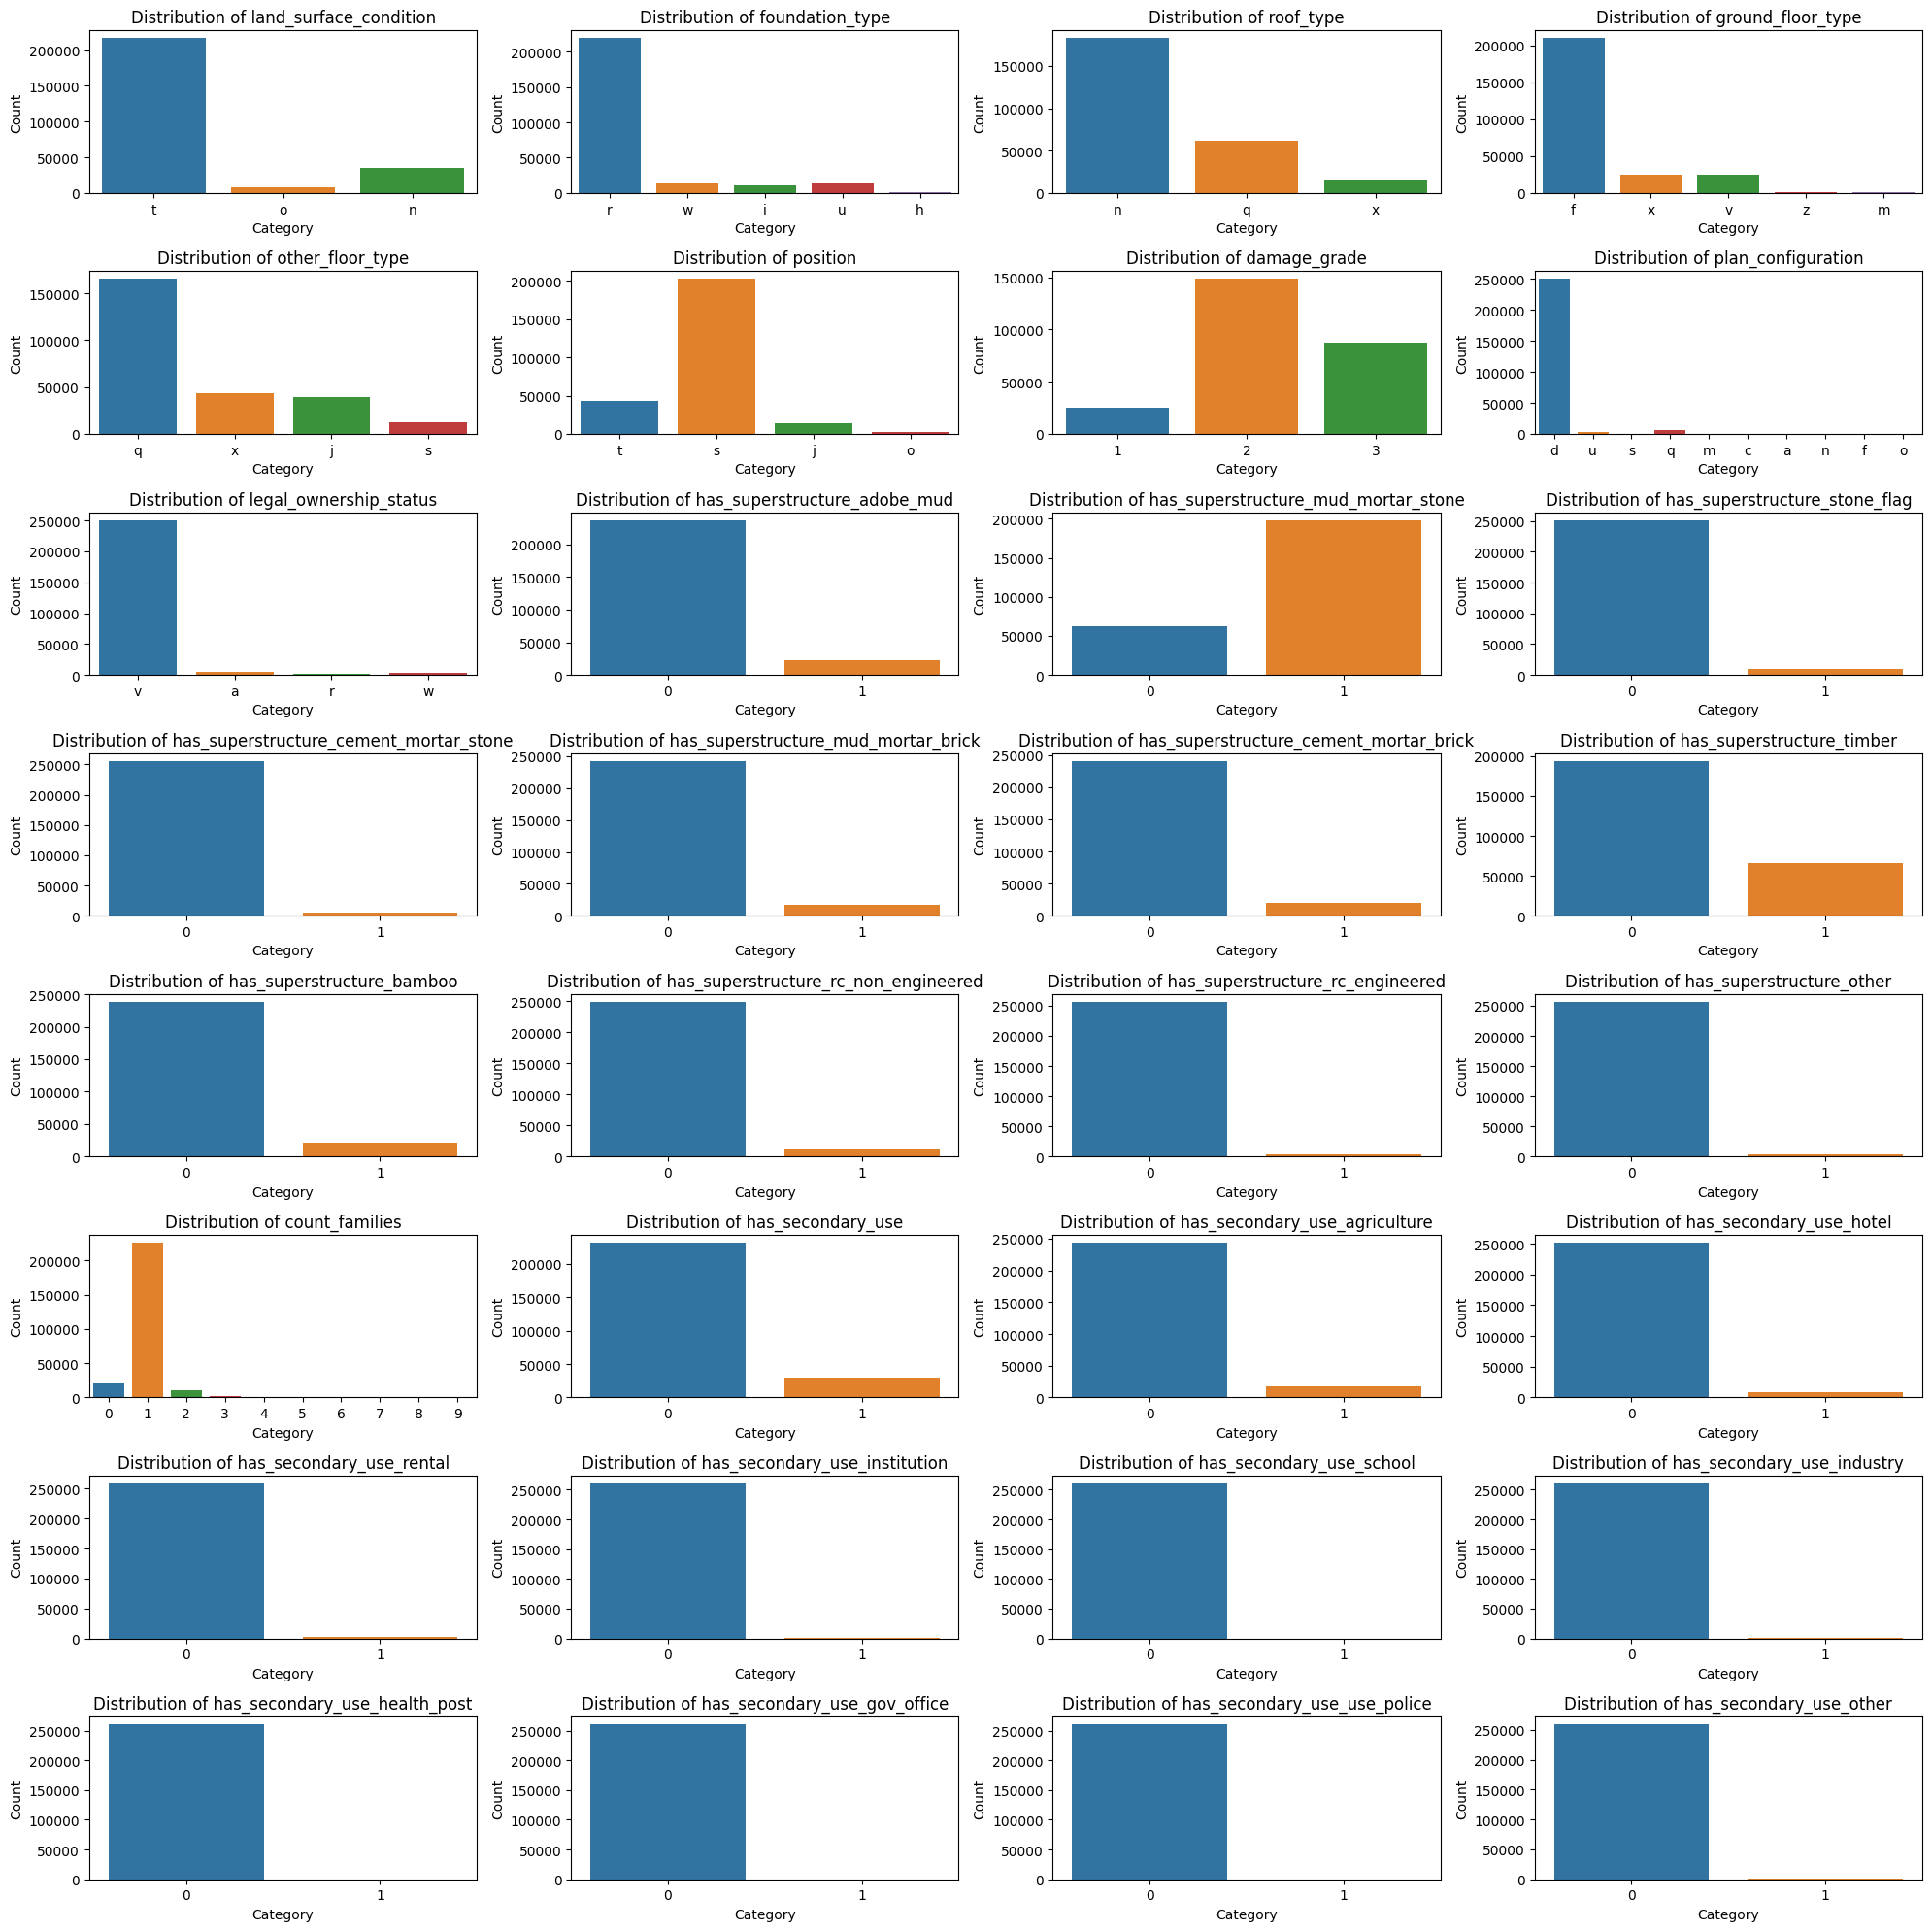

In [22]:
# count plot
plt.figure(figsize=(20, 20))
for i, col in enumerate(category_columns, 1):
    plt.subplot(8, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')

plt.tight_layout()
# save this plot
plt.savefig(os.path.join("D:\Internship\Rubixe\Earthquake-Damage-Prediction\Figures", "Category Distrubution Plot.png"))
plt.show()


In [23]:
total_count=len(df[category_columns])

for col in category_columns:
    value_counts = df[col].value_counts()
    print("Unique values in: ", col)
    for value, count in value_counts.items():
        percentage = (count/total_count)*100
        print(f"{value}: {count} ({percentage: .2f}%)")

    print("=========")

Unique values in:  land_surface_condition
t: 216757 ( 83.18%)
n: 35528 ( 13.63%)
o: 8316 ( 3.19%)
Unique values in:  foundation_type
r: 219196 ( 84.11%)
w: 15118 ( 5.80%)
u: 14260 ( 5.47%)
i: 10579 ( 4.06%)
h: 1448 ( 0.56%)
Unique values in:  roof_type
n: 182842 ( 70.16%)
q: 61576 ( 23.63%)
x: 16183 ( 6.21%)
Unique values in:  ground_floor_type
f: 209619 ( 80.44%)
x: 24877 ( 9.55%)
v: 24593 ( 9.44%)
z: 1004 ( 0.39%)
m: 508 ( 0.19%)
Unique values in:  other_floor_type
q: 165282 ( 63.42%)
x: 43448 ( 16.67%)
j: 39843 ( 15.29%)
s: 12028 ( 4.62%)
Unique values in:  position
s: 202090 ( 77.55%)
t: 42896 ( 16.46%)
j: 13282 ( 5.10%)
o: 2333 ( 0.90%)
Unique values in:  damage_grade
2: 148259 ( 56.89%)
3: 87218 ( 33.47%)
1: 25124 ( 9.64%)
Unique values in:  plan_configuration
d: 250072 ( 95.96%)
q: 5692 ( 2.18%)
u: 3649 ( 1.40%)
s: 346 ( 0.13%)
c: 325 ( 0.12%)
a: 252 ( 0.10%)
o: 159 ( 0.06%)
m: 46 ( 0.02%)
n: 38 ( 0.01%)
f: 22 ( 0.01%)
Unique values in:  legal_ownership_status
v: 250939 ( 96.29%

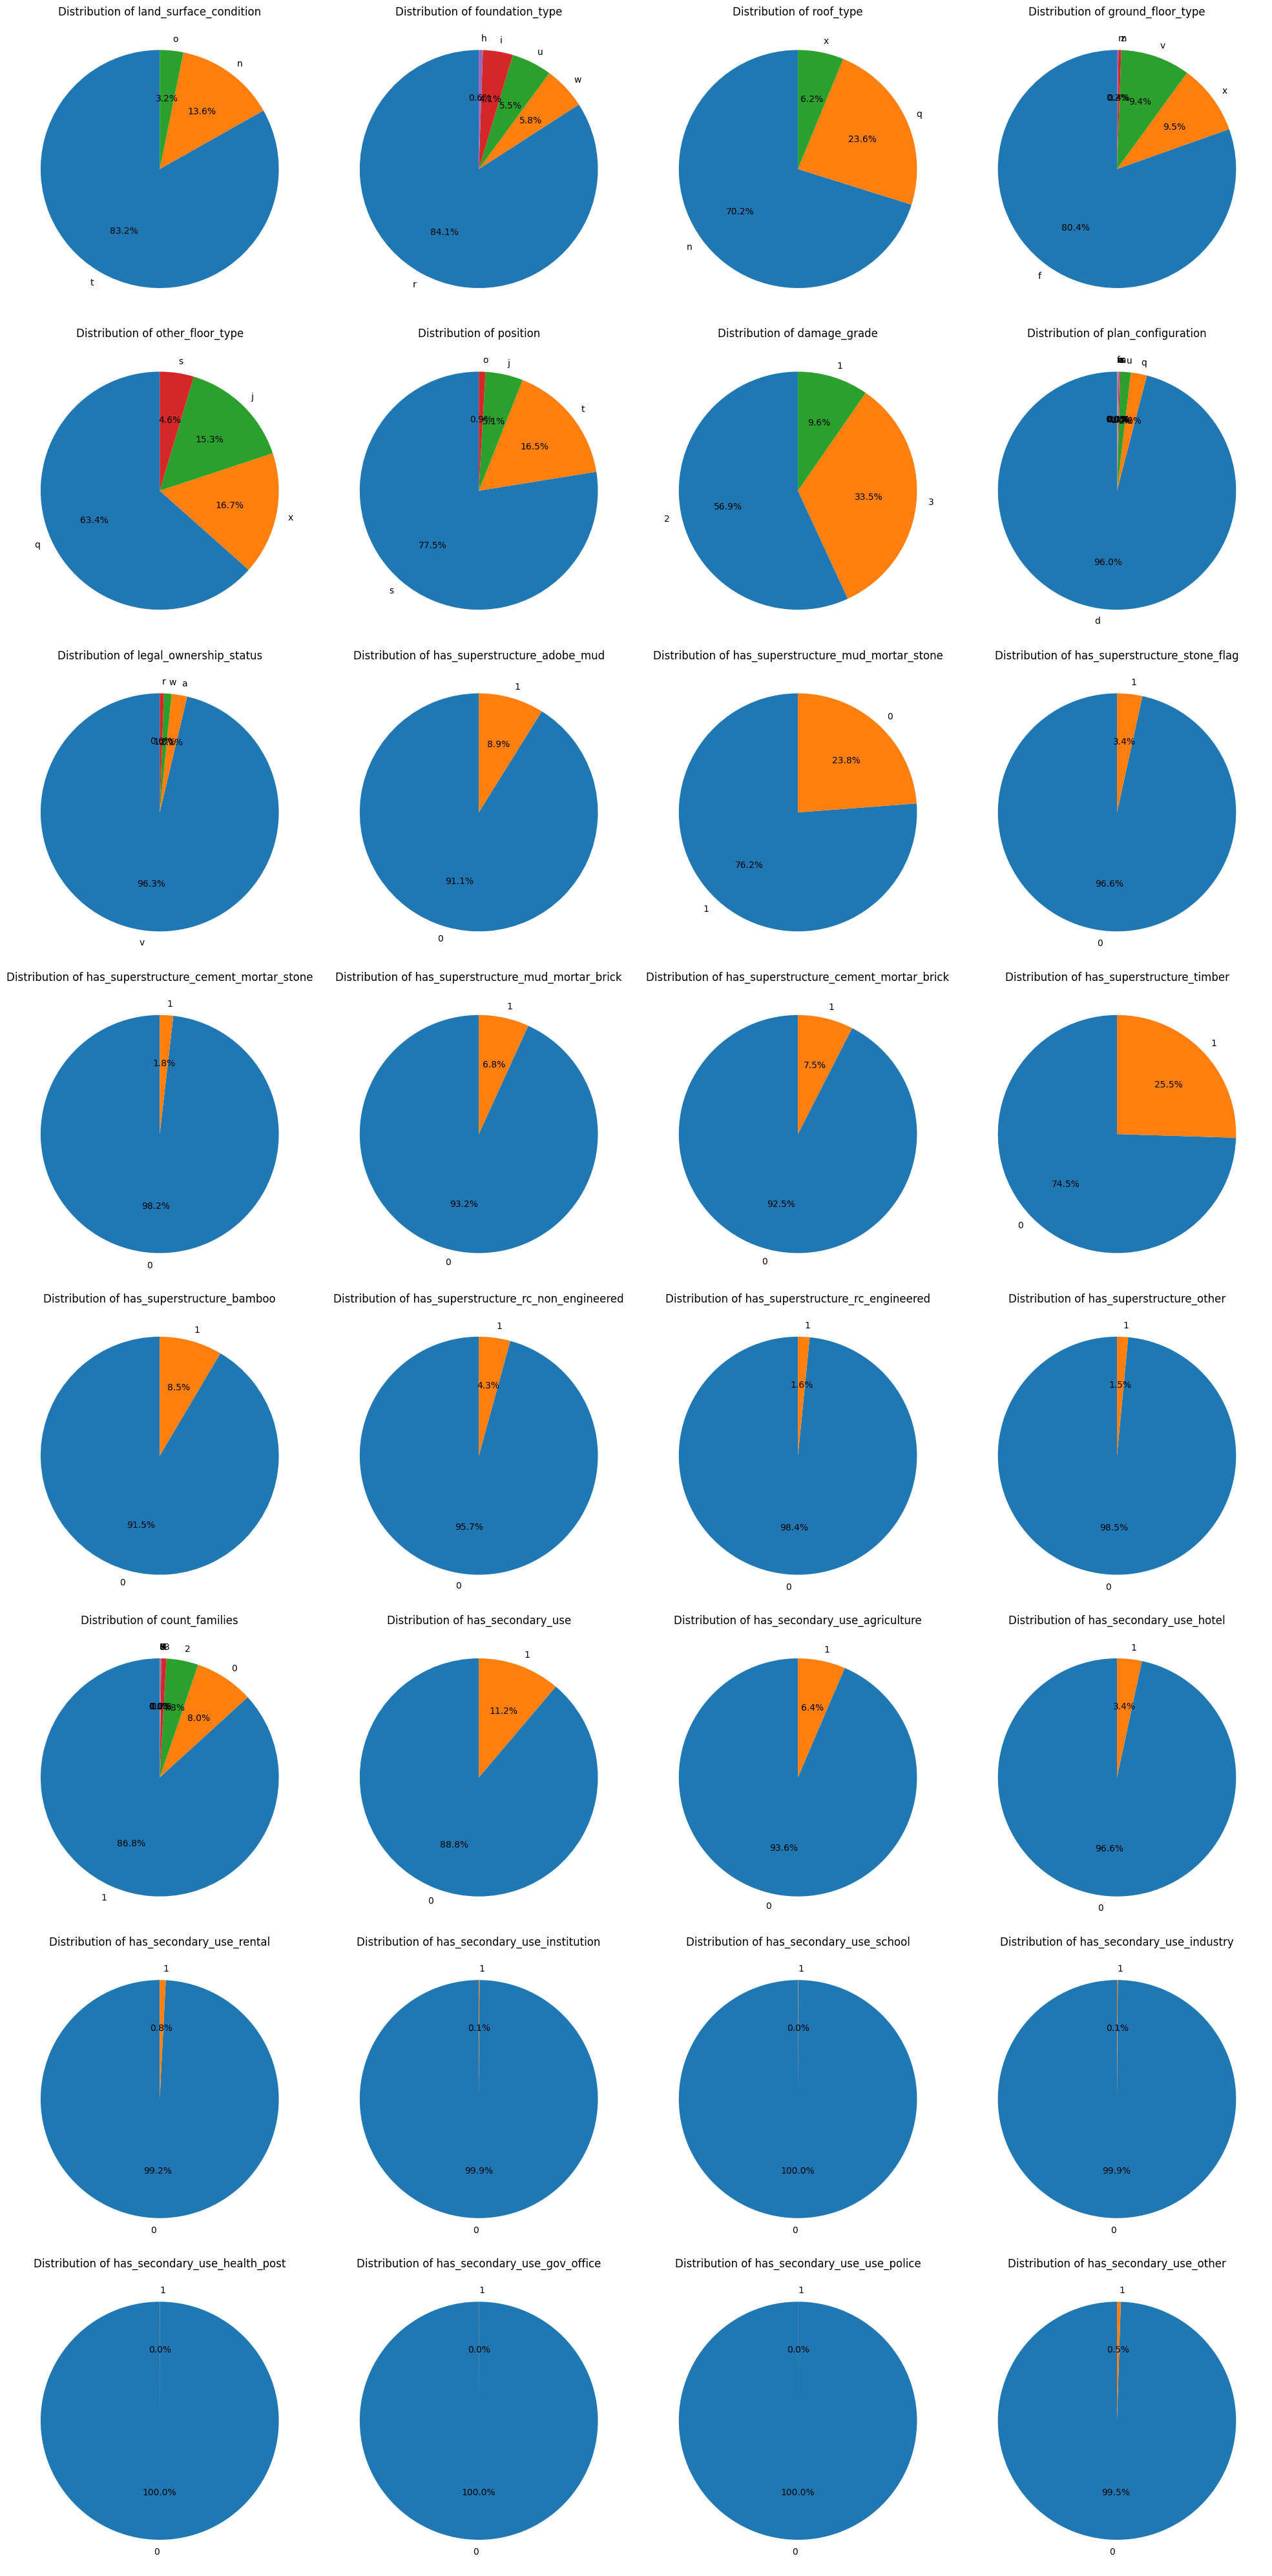

In [24]:
# pie plot
num_cols = 4
num_rows = (len(category_columns)-1)// num_cols+1

plt.figure(figsize=(5*num_cols, 5*num_rows))
for i, col in enumerate(category_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    category_counts = df[col].value_counts()
    plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.savefig(os.path.join("D:\Internship\Rubixe\Earthquake-Damage-Prediction\Figures", "Pie plot.png"))

    
plt.tight_layout()
plt.show()


For numeric columns

In [25]:
numeric_column = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
                   'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']

len(numeric_column)

8

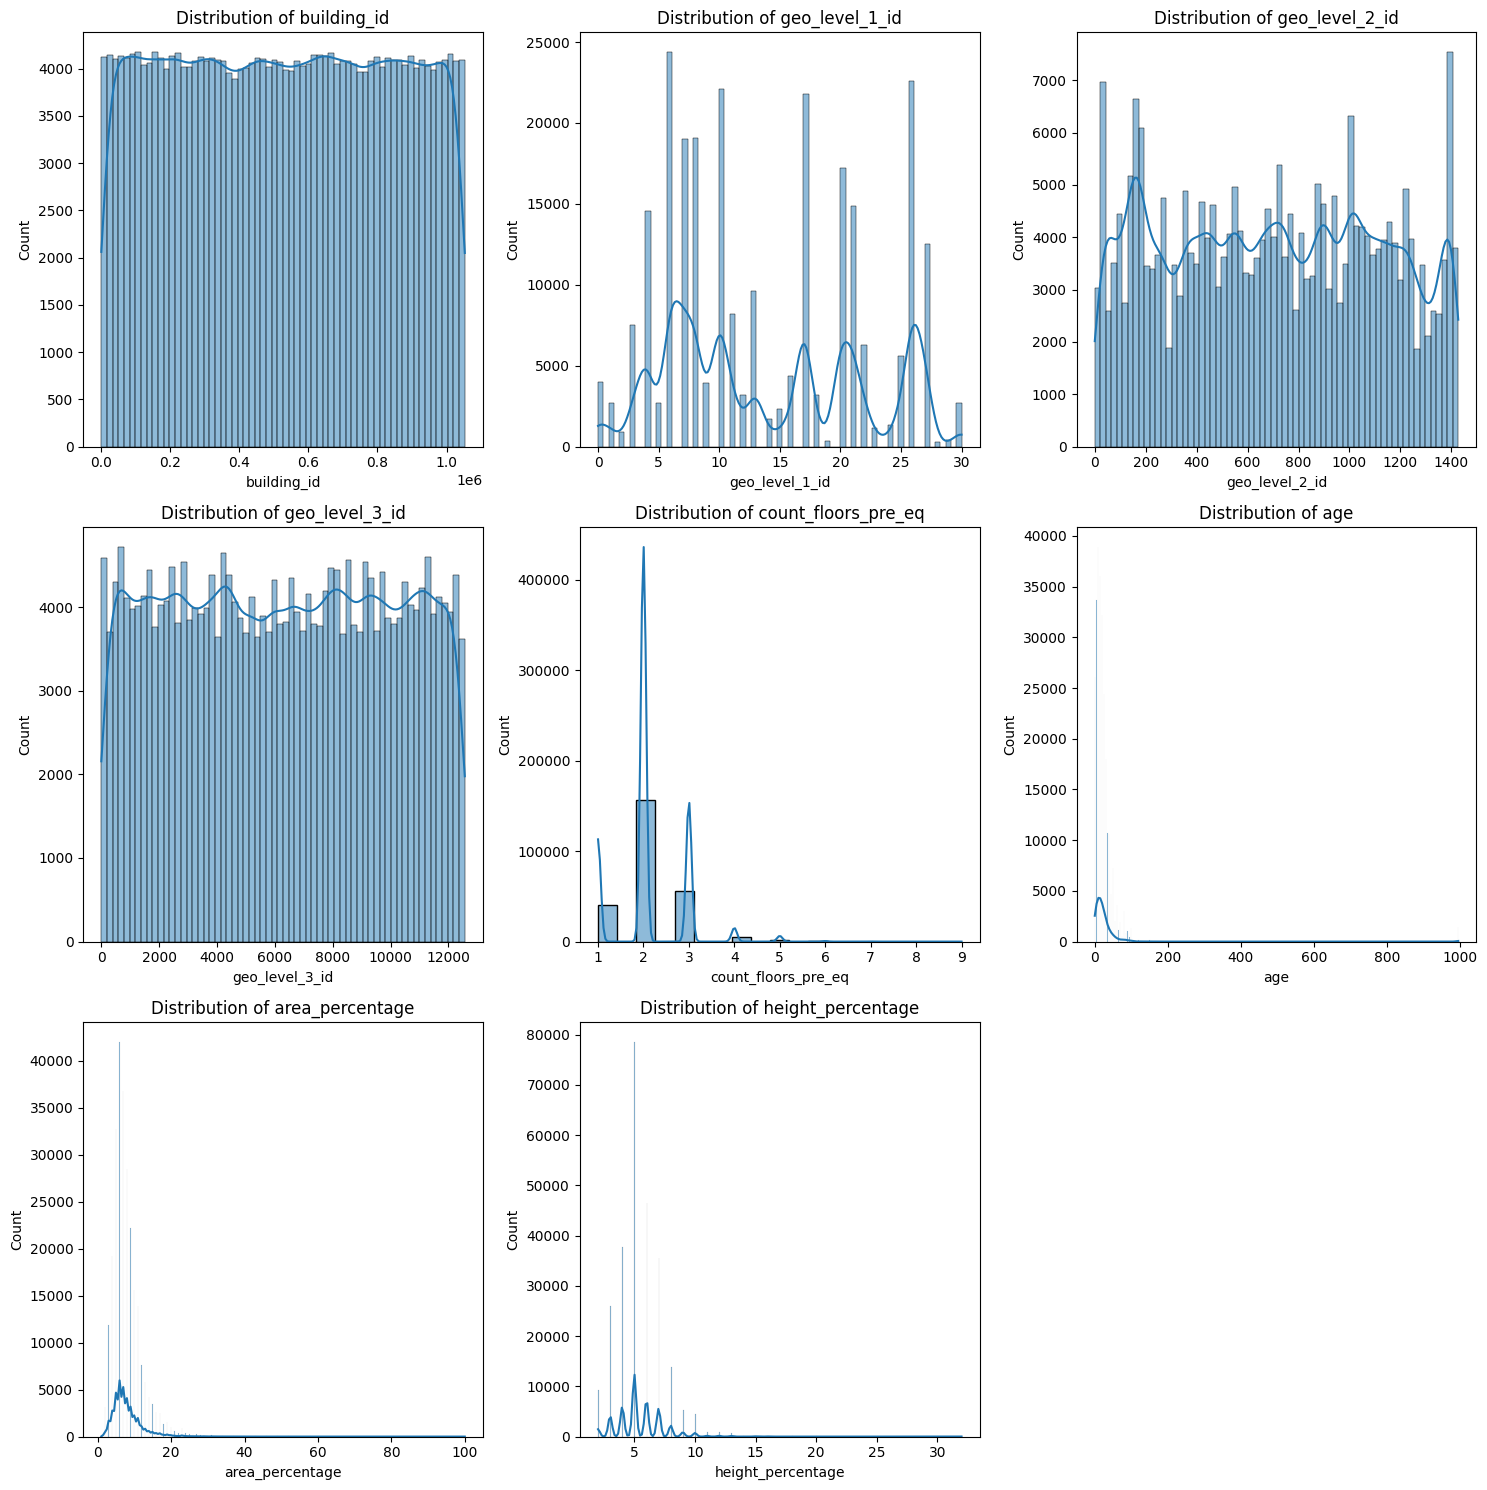

In [26]:
# count plot
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_column, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.savefig(os.path.join("D:\Internship\Rubixe\Earthquake-Damage-Prediction\Figures", "Numeric Distribution Plot.png"))
plt.tight_layout()
plt.show()

#### 2. Bivariate Analysis 

In [27]:
corr = df.corr()
corr

building_id  damage_grade  \
building_id                                1.000000      0.001063   
damage_grade                               0.001063      1.000000   
geo_level_1_id                            -0.002850     -0.072347   
geo_level_2_id                             0.000347      0.043161   
geo_level_3_id                            -0.000393      0.007932   
count_floors_pre_eq                       -0.000654      0.122308   
age                                       -0.001476      0.029273   
area_percentage                           -0.002070     -0.125221   
height_percentage                          0.000096      0.048130   
has_superstructure_adobe_mud              -0.000307      0.055314   
has_superstructure_mud_mortar_stone        0.002423      0.291325   
has_superstructure_stone_flag              0.001443      0.066039   
has_superstructure_cement_mortar_stone    -0.000827     -0.060295   
has_superstructure_mud_mortar_brick       -0.003768      0.014561   
has_superstructure_cement_mortar_brick     0.001933     -0.254131   
has_superstructure_timber                  0.001967     -0.069852   
has_superstructure_bamboo                  0.001266     -0.063051   
has_superstructure_rc_non_engineered       0.002472     -0.158145   
has_superstructure_rc_engineered          -0.002259     -0.179014   
has_superstructure_other                   0.002171     -0.030224   
count_families                            -0.000599      0.056151   
has_secondary_use                          0.002606     -0.079630   
has_secondary_use_agriculture              0.002631      0.011309   
has_secondary_use_hotel                    0.001934     -0.097942   
has_secondary_use_rental                  -0.002152     -0.083754   
has_secondary_use_institution              0.000706     -0.028728   
has_secondary_use_school                  -0.000362     -0.011692   
has_secondary_use_industry                 0.002348     -0.011024   
has_secondary_use_health_post             -0.000374     -0.008543   
has_secondary_use_gov_office               0.000538     -0.009378   
has_secondary_use_use_police              -0.003116     -0.001656   
has_secondary_use_other                   -0.002295     -0.016334   

                                        geo_level_1_id  geo_level_2_id  \
building_id                                  -0.002850        0.000347   
damage_grade                                 -0.072347        0.043161   
geo_level_1_id                                1.000000       -0.061405   
geo_level_2_id                               -0.061405        1.000000   
geo_level_3_id                                0.002718        0.000921   
count_floors_pre_eq                          -0.089364        0.047730   
age                                          -0.003908        0.012594   
area_percentage                               0.071158       -0.049443   
height_percentage                            -0.063474        0.035516   
has_superstructure_adobe_mud                 -0.018245        0.015833   
has_superstructure_mud_mortar_stone          -0.152038        0.076491   
has_superstructure_stone_flag                 0.007677       -0.008743   
has_superstructure_cement_mortar_stone        0.023656       -0.009122   
has_superstructure_mud_mortar_brick          -0.028854        0.014246   
has_superstructure_cement_mortar_brick        0.134121       -0.079875   
has_superstructure_timber                     0.144985       -0.023927   
has_superstructure_bamboo                     0.074169       -0.032588   
has_superstructure_rc_non_engineered          0.016454       -0.038173   
has_superstructure_rc_engineered              0.015767       -0.036074   
has_superstructure_other                      0.022670       -0.020144   
count_families                                0.035108       -0.012439   
has_secondary_use                            -0.010428       -0.001519   
has_secondary_use_agriculture                -0.019786      

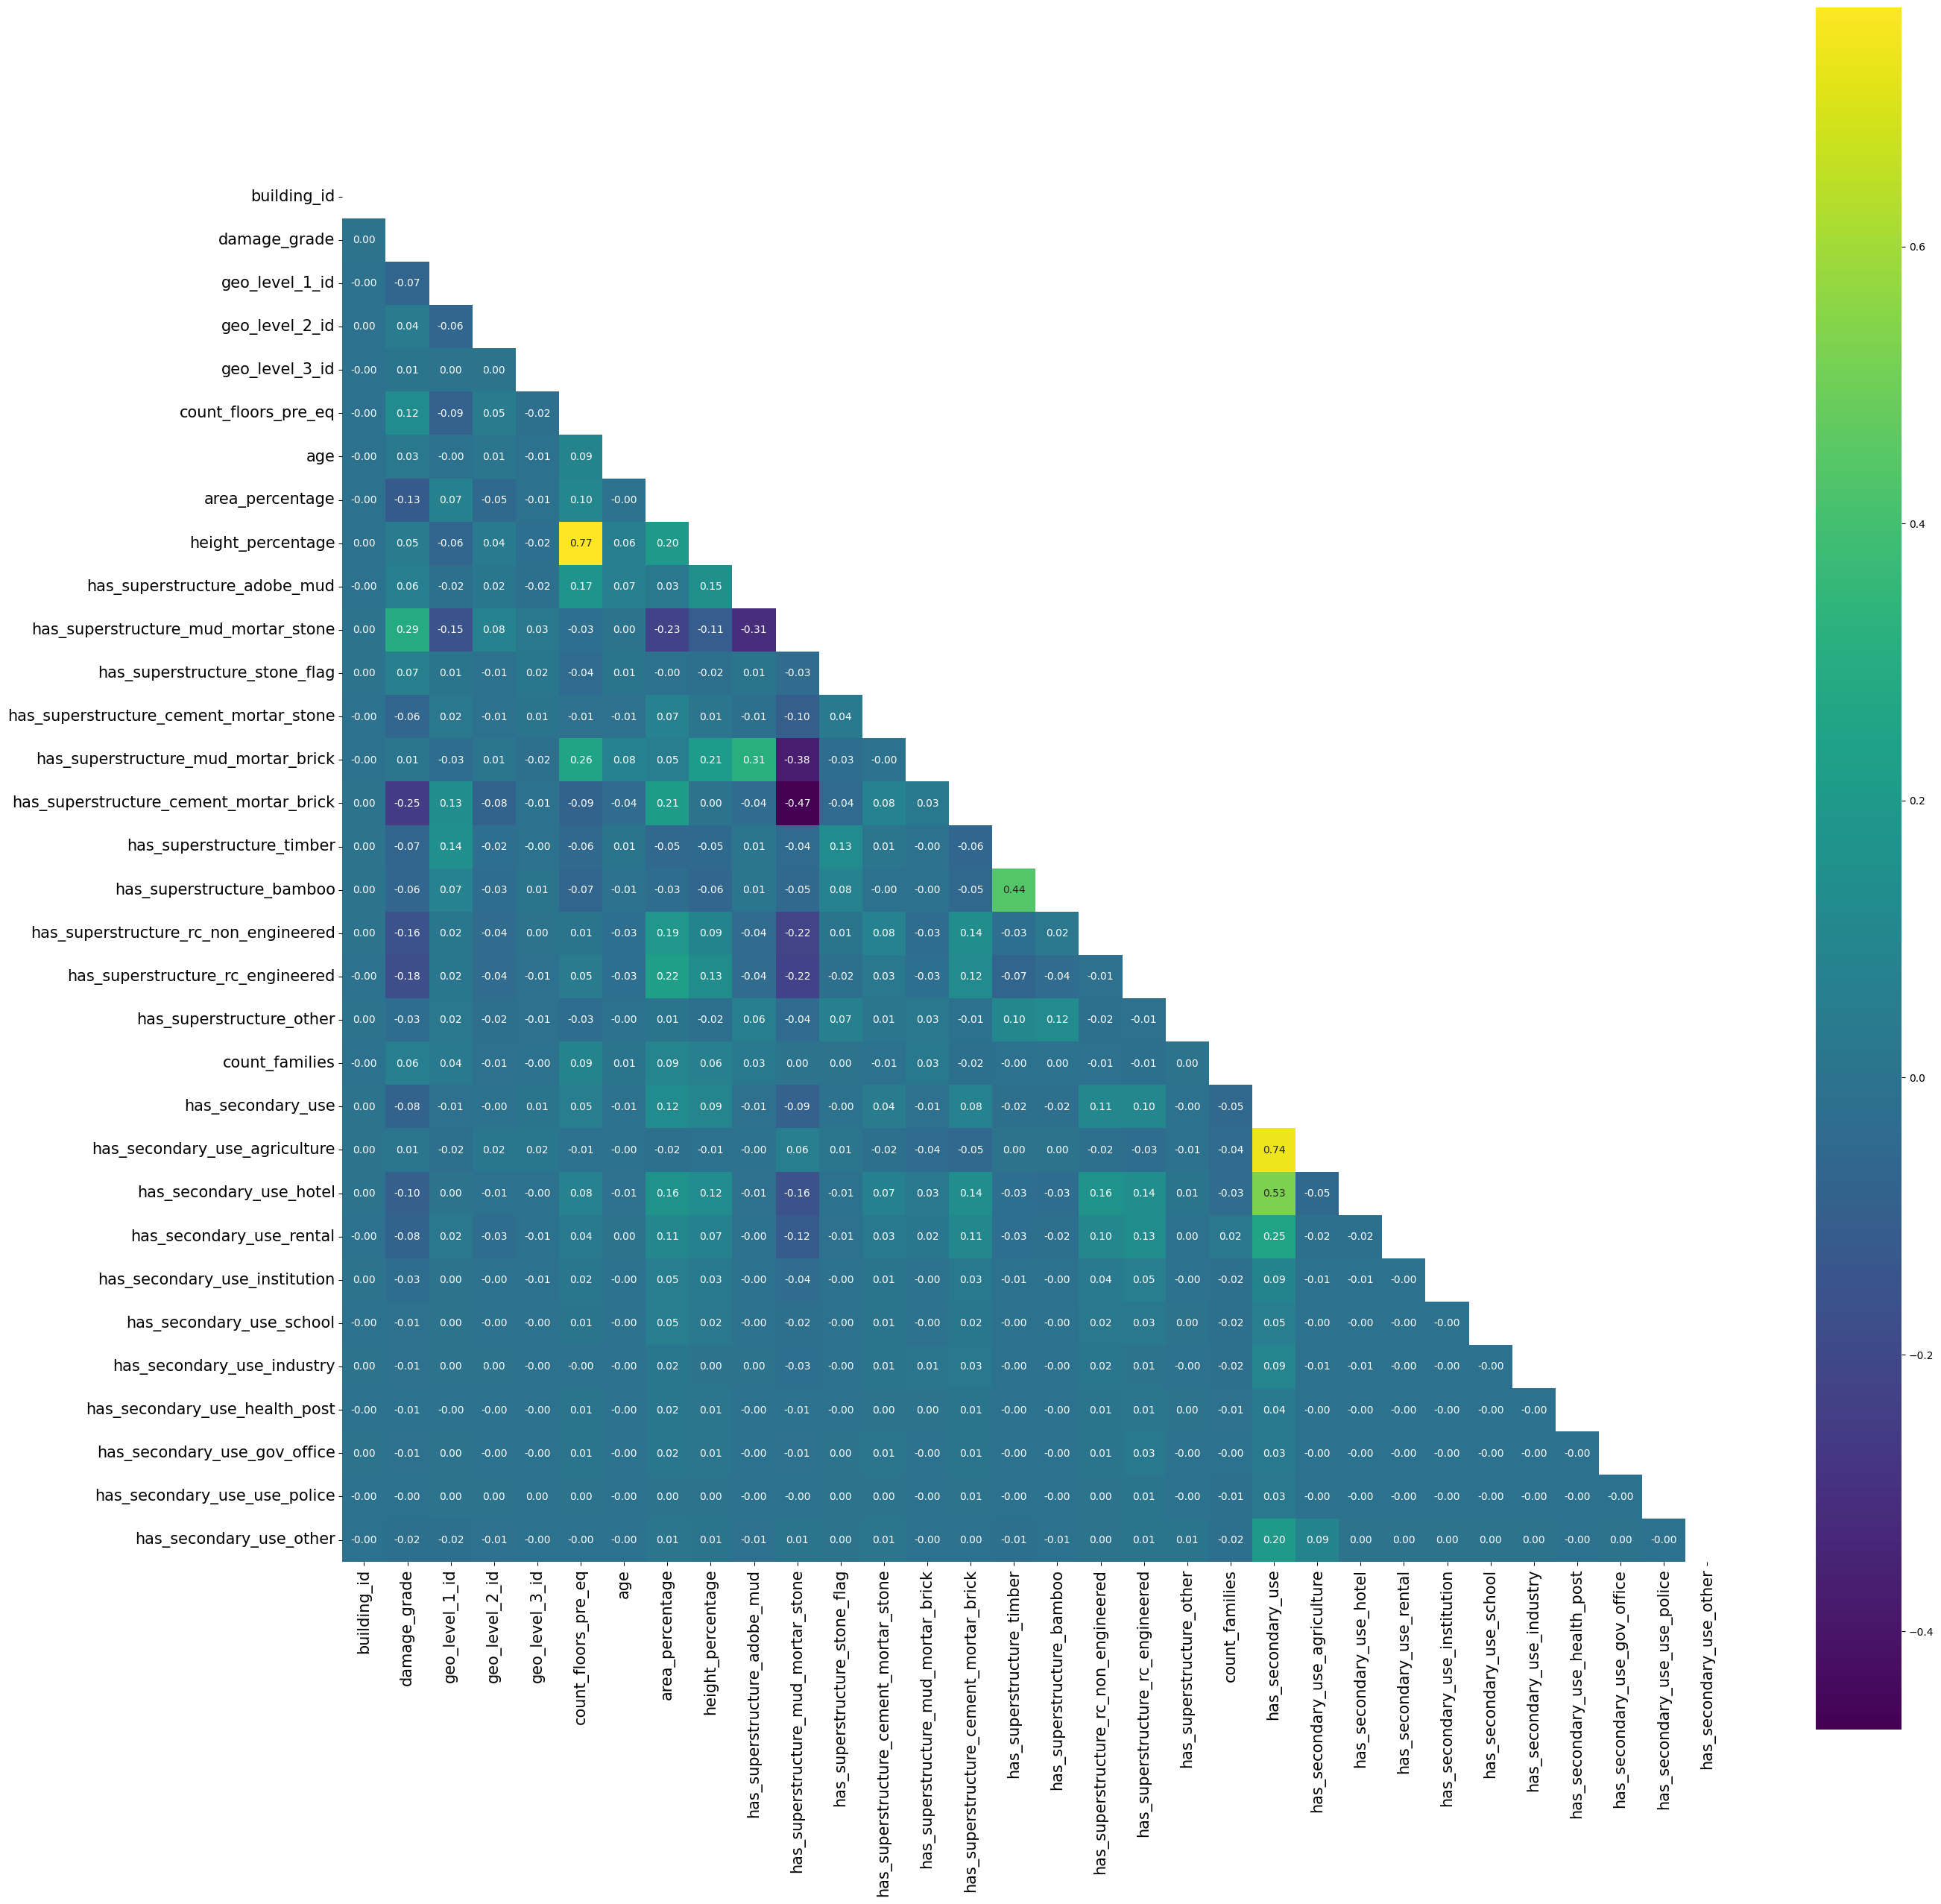

In [28]:
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(30,30))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f" , cmap='viridis', square=True, mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(os.path.join("D:\Internship\Rubixe\Earthquake-Damage-Prediction\Figures", "heatmap.png"))

There is strong correlation between:
1. "height_percentage" and "count_floors_pre_eq" :- 0.77
2. "has_secondary_use_agriculture" and "has_secondary_use" :- 0.74
3. "has_secondary_use_hotel" and "has_secondary_use" :- 0.53
4. "has_superstructure_cement_mortar_brick" and "has_superstructure_mud_mortar_stone" :- -0.38
5. "has_superstructure_mud_mortar_brick" and "has_superstructure_mud_mortar_stone" :- -0.47

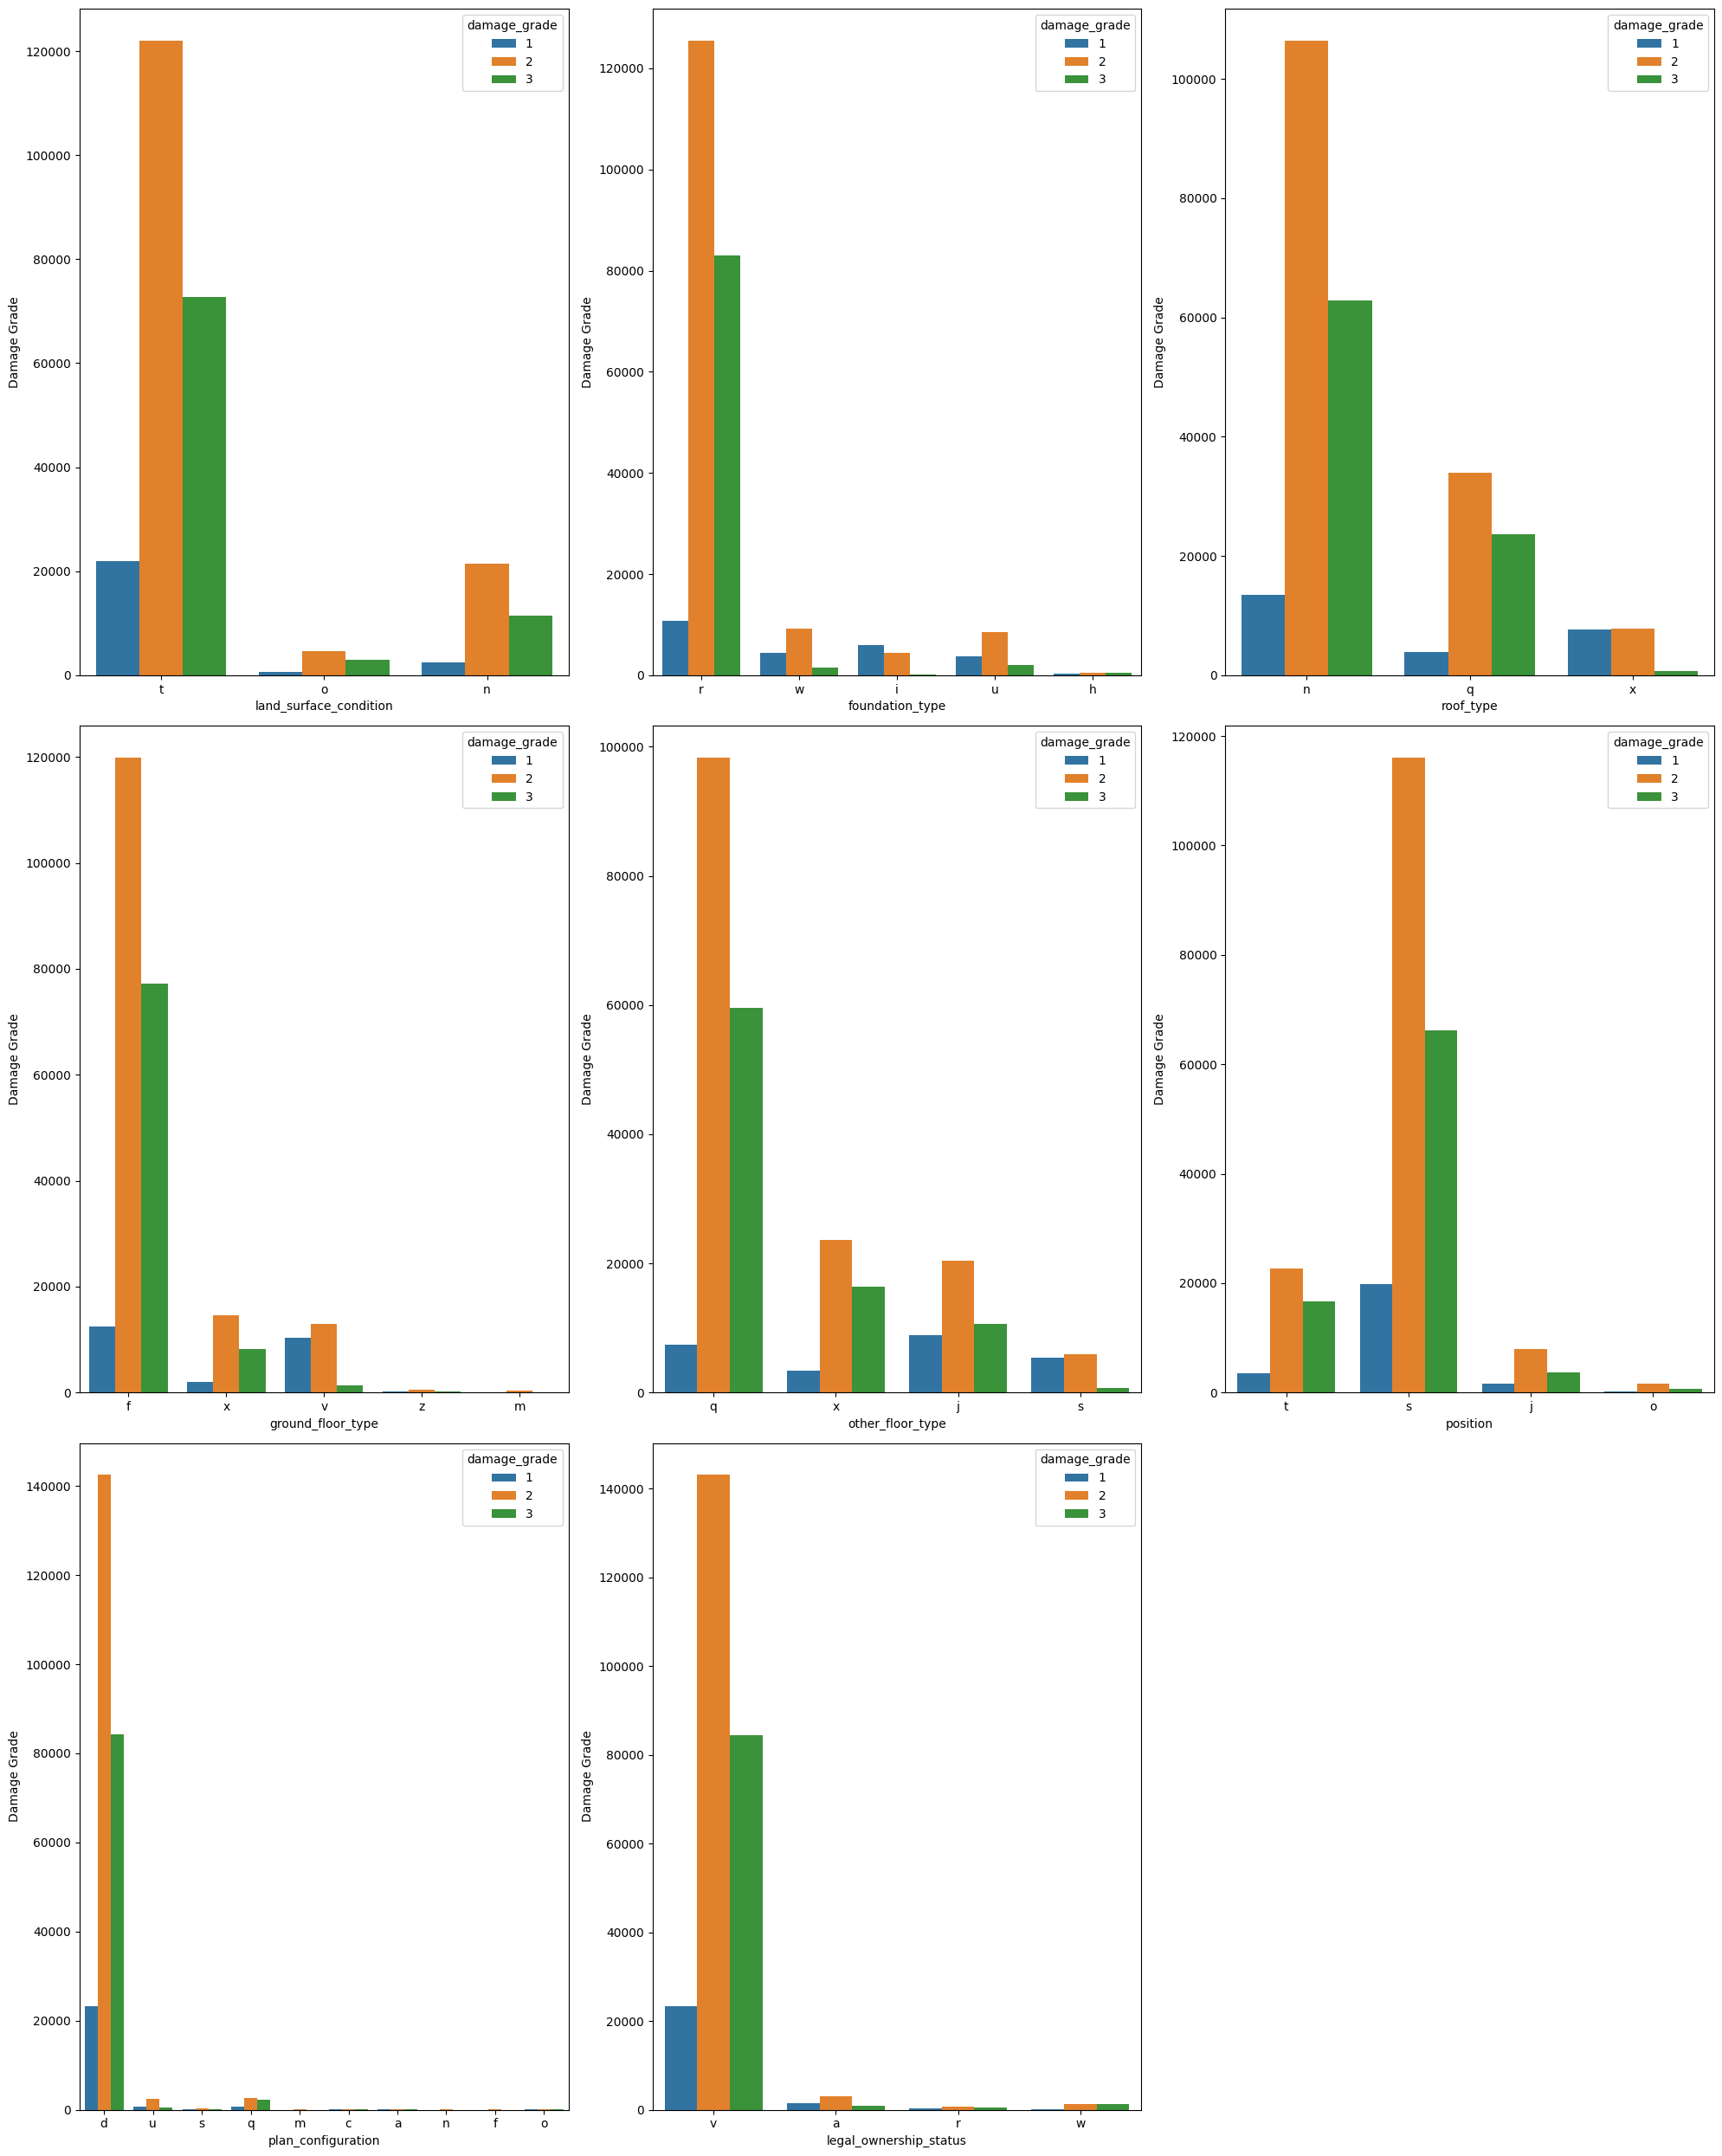

In [29]:
categorical_data = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 
                    'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

plt.figure(figsize=(20, 25))
for i, category in enumerate(categorical_data, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(x=category, data=df, hue='damage_grade')
    plt.xlabel(category)
    plt.ylabel('Damage Grade')

plt.tight_layout()
plt.show()

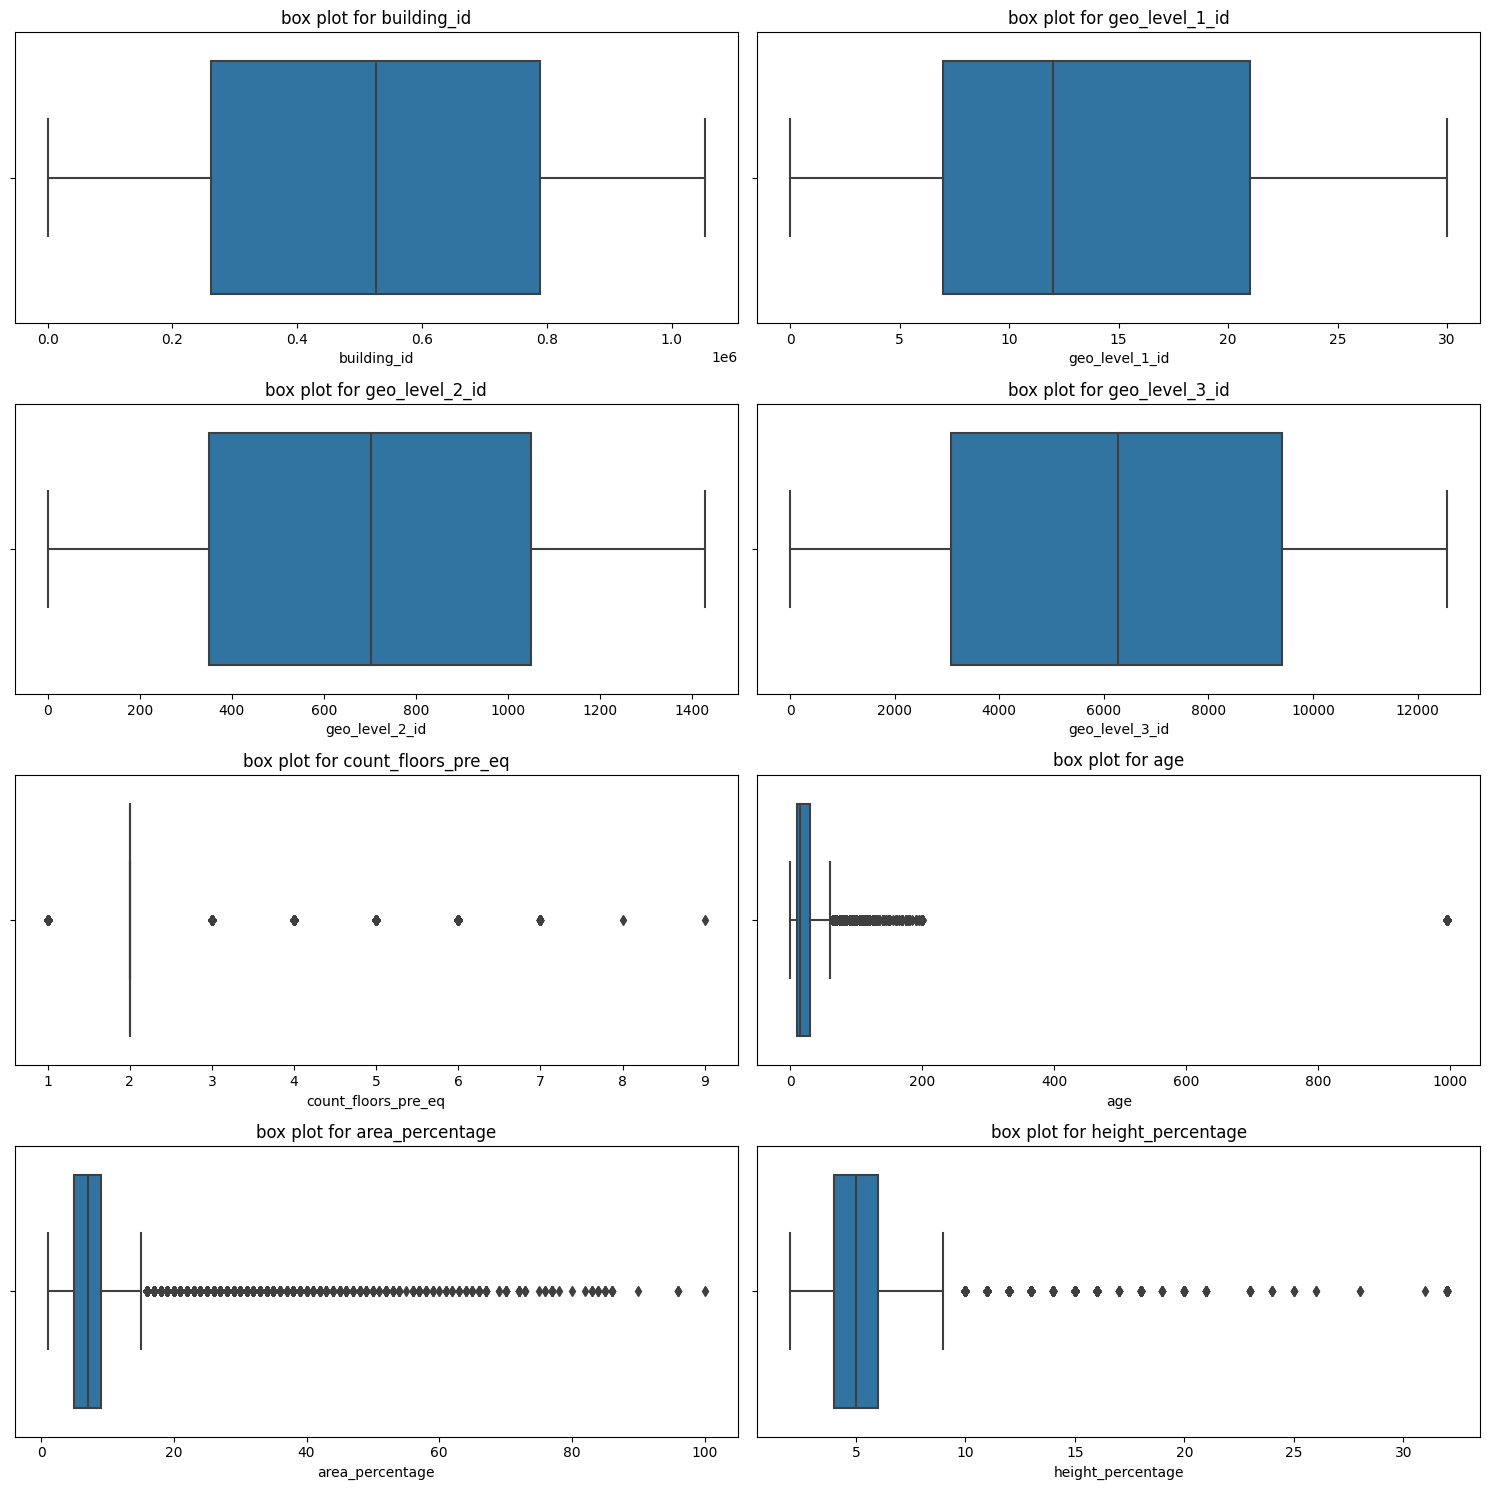

In [30]:
# box plot
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_column, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'box plot for {col}')

plt.tight_layout()
plt.show()


There is 3 columns Age, area_percentage and hieght_percentage in which outliers are present.

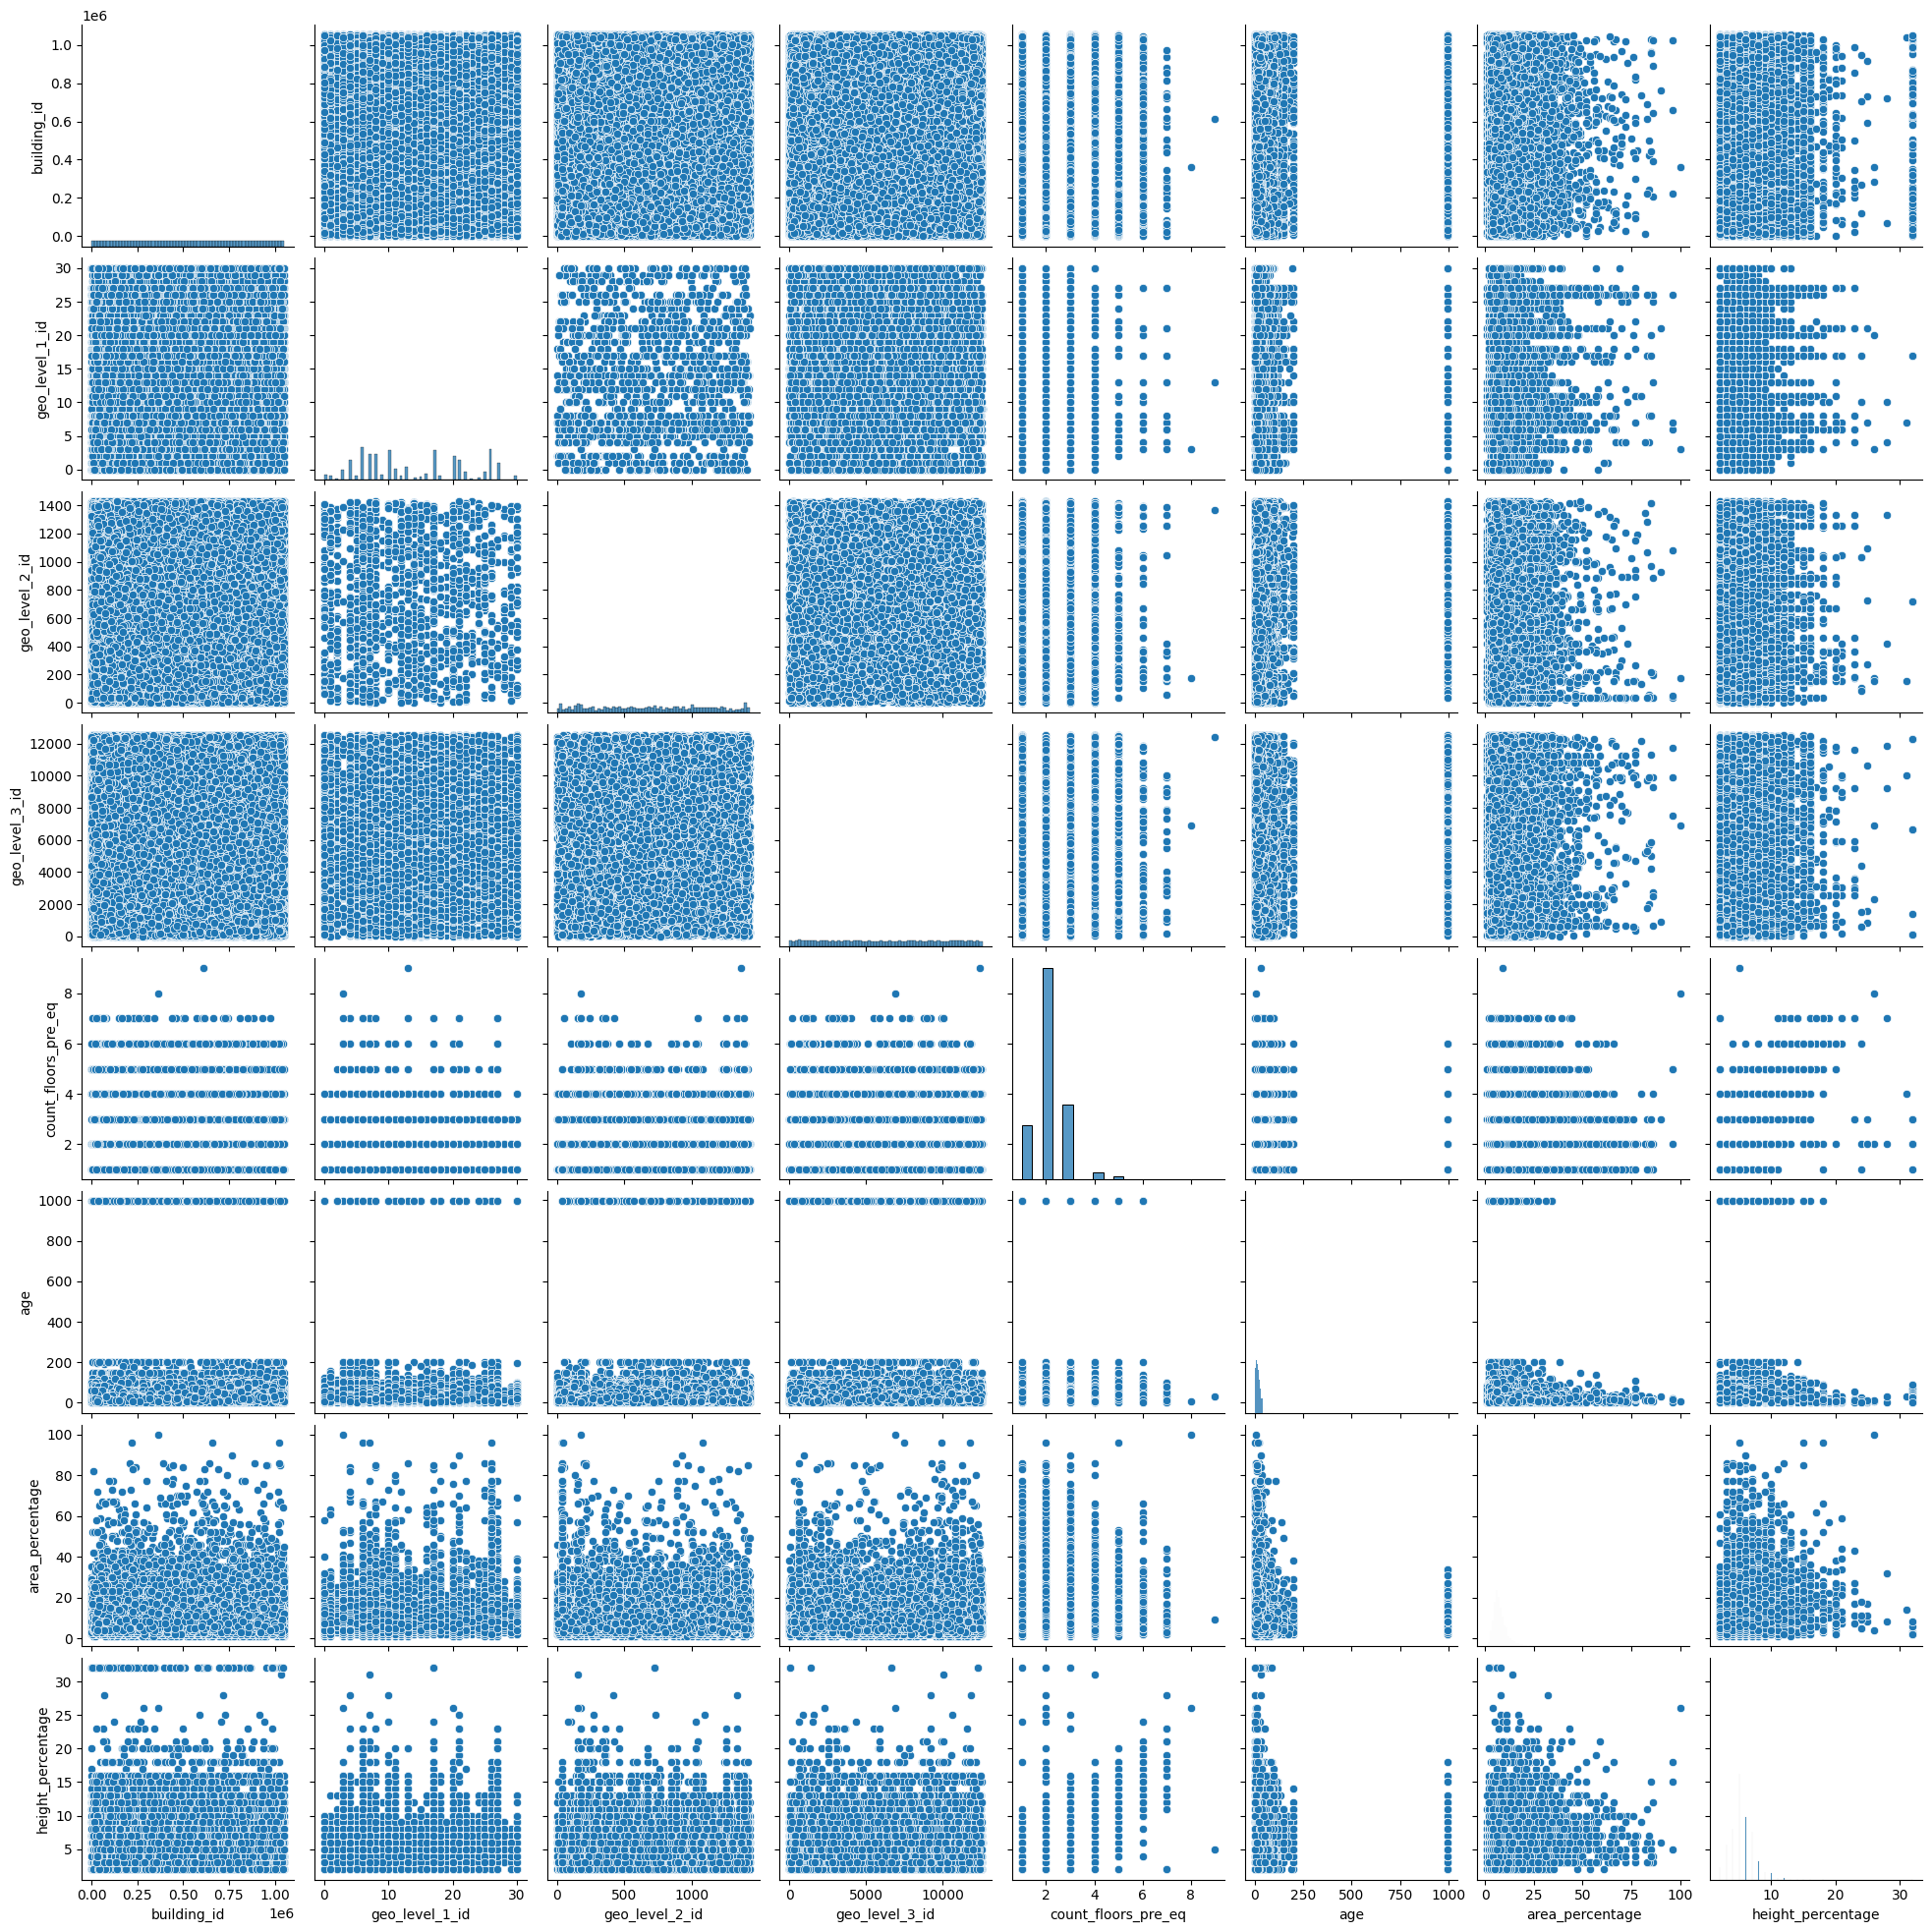

In [31]:
pair_df = df[numeric_column]
sns.pairplot(pair_df)
plt.savefig(os.path.join("D:\Internship\Rubixe\Earthquake-Damage-Prediction\Figures", "pairplot.png"))

### **Preprocessing**

In [32]:
df = df.set_index("building_id")

Handle outliers

In [33]:
# For age columns
df = df[df["age"]<=100]

# For Hieght percentage 
df = df[df["height_percentage"]<=10]

# For Area percentage
df = df[df["area_percentage"]<=15]

Convert categorical variable to numerical

Using OneHot Encoder 

In [34]:
# df1 = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# print(df1.shape)
# df1.head()

In [35]:
# print("Before Encoding ", df.shape)
# print("After Encoding", df1.shape)
# print(f"we have {df1.shape[1] - df.shape[1]} new columns")

with label encoder

In [36]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.shape)
df.head()

(242631, 39)


damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                                 
802906                  3               6             487           12198   
28830                   2               8             900            2812   
94947                   3              21             363            8973   
590882                  2              22             418           10694   
201944                  3              11             131            1488   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
802906                         2   30                6                  5   
28830                          2   10                8                  7   
94947                          2   10                5                  5   
590882                         2   10                6                  5   
201944                         3   30                8                  9   

             land_surface_condition  foundation_type  roof_type  \
building_id                                                       
802906                            2                2          0   
28830                             1                2          0   
94947                             2                2          0   
590882                            2                2          0   
201944                            2                2          0   

             ground_floor_type  other_floor_type  position  \
building_id                                                  
802906                       0                 1         3   
28830                        3                 1         2   
94947                        0                 3         3   
590882                       0                 3         2   
201944                       0                 3         2   

             plan_configuration  has_superstructure_adobe_mud  \
building_id                                                     
802906                        2                             1   
28830                         2                             0   
94947                         2                             0   
590882                        2                             0   
201944                        2                             1   

             has_superstructure_mud_mortar_stone  \
building_id                                        
802906                                         1   
28830                                          1   
94947                                          1   
590882                                         1   
201944                                         0   

             has_superstructure_stone_flag  \
building_id                                  
802906                                   0   
28830                                    0   
94947                                    0   
590882                                   0   
201944                                   0   

             has_superstructure_cement_mortar_stone  \
building_id                                           
802906                                            0   
28830                                             0   
94947                                             0   
590882                                            0   
201944                                            0   

             has_superstructure_mud_mortar_brick  \
building_id                                        
802906                                         0   
28830                                          0   
94947                                          0   
590882                                         0   
201944                                         0   

             has_superstructure_cement_mortar_brick  \
building_id                                           
802906                 

Split data

In [37]:
X = df.drop(columns=["damage_grade"])
y = df["damage_grade"]

In [38]:
X.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
802906                    6             487           12198   
28830                     8             900            2812   
94947                    21             363            8973   
590882                   22             418           10694   
201944                   11             131            1488   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
802906                         2   30                6                  5   
28830                          2   10                8                  7   
94947                          2   10                5                  5   
590882                         2   10                6                  5   
201944                         3   30                8                  9   

             land_surface_condition  foundation_type  roof_type  \
building_id                                                       
802906                            2                2          0   
28830                             1                2          0   
94947                             2                2          0   
590882                            2                2          0   
201944                            2                2          0   

             ground_floor_type  other_floor_type  position  \
building_id                                                  
802906                       0                 1         3   
28830                        3                 1         2   
94947                        0                 3         3   
590882                       0                 3         2   
201944                       0                 3         2   

             plan_configuration  has_superstructure_adobe_mud  \
building_id                                                     
802906                        2                             1   
28830                         2                             0   
94947                         2                             0   
590882                        2                             0   
201944                        2                             1   

             has_superstructure_mud_mortar_stone  \
building_id                                        
802906                                         1   
28830                                          1   
94947                                          1   
590882                                         1   
201944                                         0   

             has_superstructure_stone_flag  \
building_id                                  
802906                                   0   
28830                                    0   
94947                                    0   
590882                                   0   
201944                                   0   

             has_superstructure_cement_mortar_stone  \
building_id                                           
802906                                            0   
28830                                             0   
94947                                             0   
590882                                            0   
201944                                            0   

             has_superstructure_mud_mortar_brick  \
building_id                                        
802906                                         0   
28830                                          0   
94947                                          0   
590882                                         0   
201944                                         0   

             has_superstructure_cement_mortar_brick  \
building_id                                           
802906                                            0   
28830                                             0   
94947      

In [39]:
y.head()

building_id
802906    3
28830     2
94947     3
590882    2
201944    3
Name: damage_grade, dtype: int64

Balancing data

In [40]:
y.value_counts()

2    138646
3     83130
1     20855
Name: damage_grade, dtype: int64

Since we have imbalance data we will balance it with SMOTE technique.

In [41]:
smote = SMOTE()
x_sm , y_sm = smote.fit_resample(X, y)

In [42]:
x_sm.shape

(415938, 38)

In [43]:
print(f" before smote value: \n{y.value_counts()} ")
print(f" after smote value: \n{y_sm.value_counts()} ")

 before smote value: 
2    138646
3     83130
1     20855
Name: damage_grade, dtype: int64 
 after smote value: 
3    138646
2    138646
1    138646
Name: damage_grade, dtype: int64 


### **Feature Engineering** 

In [44]:
X_with_const = add_constant(x_sm)
vif = pd.DataFrame()
vif["Variable"] = x_sm.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]
print(vif)

                                  Variable        VIF
0                           geo_level_1_id   1.174884
1                           geo_level_2_id   1.031614
2                           geo_level_3_id   1.006060
3                      count_floors_pre_eq   2.965552
4                                      age   1.273353
5                          area_percentage   1.172006
6                        height_percentage   2.584761
7                   land_surface_condition   1.019727
8                          foundation_type   1.383314
9                                roof_type   1.428177
10                       ground_floor_type   1.362890
11                        other_floor_type   1.394102
12                                position   1.064592
13                      plan_configuration   1.021767
14            has_superstructure_adobe_mud   1.229018
15     has_superstructure_mud_mortar_stone   1.829789
16           has_superstructure_stone_flag   1.041359
17  has_superstructure_cemen

There is "has_secondary_use", "has_secondary_use_agriculture", "has_secondary_use_hotel" columns are highly correlated with other indepedent features.


We will remove highly correlated features.

First we will try to remove first column and check VIF

In [45]:
x_sm = x_sm.drop(columns=["has_secondary_use"])
x_sm.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  \
0               6             487           12198                    2   30   
1               8             900            2812                    2   10   
2              21             363            8973                    2   10   
3              22             418           10694                    2   10   
4              11             131            1488                    3   30   

   area_percentage  height_percentage  land_surface_condition  \
0                6                  5                       2   
1                8                  7                       1   
2                5                  5                       2   
3                6                  5                       2   
4                8                  9                       2   

   foundation_type  roof_type  ground_floor_type  other_floor_type  position  \
0                2          0                  0                 1         3   
1                2          0                  3                 1         2   
2                2          0                  0                 3         3   
3                2          0                  0                 3         2   
4                2          0                  0                 3         2   

   plan_configuration  has_superstructure_adobe_mud  \
0                   2                             1   
1                   2                             0   
2                   2                             0   
3                   2                             0   
4                   2                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   legal_ownership_status  count_families  has_secondary_use_agriculture  \
0                       2               1

In [46]:
X_with_const = add_constant(x_sm)
vif = pd.DataFrame()
vif["Variable"] = x_sm.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]
print(vif)

                                  Variable       VIF
0                           geo_level_1_id  1.174820
1                           geo_level_2_id  1.031502
2                           geo_level_3_id  1.006037
3                      count_floors_pre_eq  2.965427
4                                      age  1.273240
5                          area_percentage  1.171925
6                        height_percentage  2.582467
7                   land_surface_condition  1.019725
8                          foundation_type  1.382360
9                                roof_type  1.427742
10                       ground_floor_type  1.362629
11                        other_floor_type  1.394101
12                                position  1.062680
13                      plan_configuration  1.021712
14            has_superstructure_adobe_mud  1.228745
15     has_superstructure_mud_mortar_stone  1.826006
16           has_superstructure_stone_flag  1.041263
17  has_superstructure_cement_mortar_stone  1.

After remove one column Now there is no highly correlated independent variables.

Selecting Best feature for prediction

In [47]:
x_sm.shape

(415938, 37)

In [48]:
ordered_rank_feature = SelectKBest(score_func=chi2, k="all")
order_feature =ordered_rank_feature.fit(x_sm, y_sm)

best_feature_df = pd.DataFrame({ "Name":x_sm.columns, "Score": order_feature.scores_ })

best_feature_df = best_feature_df.sort_values(by="Score", ascending=False, ignore_index=True)
best_feature_df

Name          Score
0                                      age  750617.085171
1                           geo_level_2_id  210802.576784
2                           geo_level_3_id  118837.937691
3                           geo_level_1_id  104873.788810
4                        ground_floor_type   38673.756658
5      has_superstructure_mud_mortar_stone   37791.202994
6   has_superstructure_cement_mortar_brick   25411.957108
7                        height_percentage   14146.807101
8                      count_floors_pre_eq   13559.309936
9                                roof_type   11225.844673
10            has_superstructure_adobe_mud    7807.301888
11                        other_floor_type    7002.049086
12        has_superstructure_rc_engineered    6596.395567
13     has_superstructure_mud_mortar_brick    6094.940970
14           has_secondary_use_agriculture    5802.014053
15    has_superstructure_rc_non_engineered    5294.334307
16           has_superstructure_stone_flag    4351.444793
17                         area_percentage    2872.782318
18                          count_families    2832.045036
19               has_superstructure_timber    2333.793928
20               has_superstructure_bamboo    1862.882895
21  has_superstructure_cement_mortar_stone    1456.911961
22                         foundation_type    1217.396745
23                 has_secondary_use_hotel    1194.144368
24                  legal_ownership_status     984.764635
25                                position     710.092793
26                has_secondary_use_rental     705.509298
27                      plan_configuration     619.920985
28                 has_secondary_use_other     210.425698
29                has_superstructure_other     203.488400
30           has_secondary_use_institution      62.388489
31                  land_surface_condition      46.423625
32              has_secondary_use_industry      34.340807
33           has_secondary_use_health_post      28.647059
34            has_secondary_use_gov_office      12.250000
35                has_secondary_use_school       7.860465
36            has_secondary_use_use_police       4.571429

We can see all columns are important so first we will try with all columns

Scaling the data 

In [49]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_sm)

In [50]:
x_scaled[0]

array([0.2       , 0.3412754 , 0.97063738, 0.125     , 0.3       ,
       0.35714286, 0.375     , 1.        , 0.5       , 0.        ,
       0.        , 0.33333333, 1.        , 0.22222222, 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.11111111, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

Split data into training  and testing set

In [51]:
X_train, X_test , y_train, y_test = train_test_split(x_scaled, y_sm, stratify=y_sm, test_size=0.25, random_state=33)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(311953, 37)
(103985, 37)
(311953,)
(103985,)


In [53]:
y_train.value_counts()

3    103985
2    103984
1    103984
Name: damage_grade, dtype: int64

### **Model Building** 

We will try Random Forest, Logistic regression, XGB classifier, LightGBM and  CatBoost classification models for training dataset and find out best model with lowest mean squared error and High accuracy.

#### **Random Forest classifier**

In [58]:
# initialized model 
random_forest = RandomForestClassifier(random_state=4)

# train the model
random_forest.fit(X_train,y_train)

# prediction
test_pred = random_forest.predict(X_test)
train_pred = random_forest.predict(X_train)
    
# Calculate accuracy 
rf_test_acc = accuracy_score(y_test, test_pred)
rf_train_acc = accuracy_score(y_train, train_pred)
rf_precision = precision_score(y_test, test_pred, average="macro")
rf_recall = recall_score(y_test, test_pred, average="macro")

In [59]:
print(f"Train accuracy for Random Forest {rf_train_acc}")
print(f"Test accuracy for Random Forest {rf_test_acc}")
print(f"Precision score: {rf_precision}")
print(f"Recall score: {rf_recall}")

print("----------------------------------")
print(f"Classification Report: \n {classification_report(y_test, test_pred)}")
print("---------------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test,test_pred)}")


Train accuracy for Random Forest 0.990030549473799
Test accuracy for Random Forest 0.8125691205462326
Precision score: 0.8111246455268537
Recall score: 0.8125686709507952
----------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.93      0.91     34662
           2       0.75      0.74      0.74     34662
           3       0.79      0.77      0.78     34661

    accuracy                           0.81    103985
   macro avg       0.81      0.81      0.81    103985
weighted avg       0.81      0.81      0.81    103985

---------------------------------
Confusion matrix: 
 [[32262  1669   731]
 [ 2624 25689  6349]
 [ 1067  7050 26544]]


In [60]:
score = random_forest.feature_importances_
feature_name = x_sm.columns

rf_feature_imp_df = pd.DataFrame({"Feautres": feature_name, "Score": score})
rf_feature_imp_df = rf_feature_imp_df.sort_values(by="Score", ascending=False ,ignore_index=True)
rf_feature_imp_df

Feautres     Score
0                           geo_level_1_id  0.142562
1                           geo_level_3_id  0.127453
2                           geo_level_2_id  0.121015
3                                      age  0.116788
4                          area_percentage  0.078368
5      has_superstructure_mud_mortar_stone  0.074029
6                        height_percentage  0.045278
7                          foundation_type  0.032983
8                      count_floors_pre_eq  0.032390
9                        ground_floor_type  0.026662
10                        other_floor_type  0.025370
11                               roof_type  0.020244
12                          count_families  0.018993
13                  land_surface_condition  0.018791
14                                position  0.018262
15            has_superstructure_adobe_mud  0.012944
16               has_superstructure_timber  0.012500
17     has_superstructure_mud_mortar_brick  0.011233
18                      plan_configuration  0.008423
19           has_superstructure_stone_flag  0.008305
20                  legal_ownership_status  0.008153
21  has_superstructure_cement_mortar_brick  0.007779
22           has_secondary_use_agriculture  0.007071
23               has_superstructure_bamboo  0.007007
24    has_superstructure_rc_non_engineered  0.004304
25                 has_secondary_use_hotel  0.003504
26  has_superstructure_cement_mortar_stone  0.003459
27                has_superstructure_other  0.002569
28                 has_secondary_use_other  0.001234
29        has_superstructure_rc_engineered  0.001050
30                has_secondary_use_rental  0.000801
31              has_secondary_use_industry  0.000236
32           has_secondary_use_institution  0.000115
33           has_secondary_use_health_post  0.000045
34                has_secondary_use_school  0.000033
35            has_secondary_use_gov_office  0.000030
36            has_secondary_use_use_police  0.000017

Since Random forest is overfitting. We will apply different models also and check accuracy and mean squared errror.

#### **Logistic Regression**

In [61]:
# Initialized model
lr = LogisticRegression()

# define parameter for hyperparameter tuning 
grid = {"penalty": ["l1","l2"],
        "C":[0.01,0.1,0.5,1,1.5]}

# Perform Gridsearchcv
lr_clf = GridSearchCV(lr, param_grid=grid, scoring="accuracy", cv=5, n_jobs=-1,).fit(X_train,y_train)

# Calculate best parameter 
best_param = lr_clf.best_params_
print(best_param)

{'C': 1, 'penalty': 'l2'}


In [62]:
# Fit model using best parameter
best_lr = LogisticRegression(**best_param)
best_lr.fit(X_train,y_train)

# Prediction
test_pred = best_lr.predict(X_test)
train_pred = best_lr.predict(X_train)

# Calculate accuracy 
lr_test_acc = accuracy_score(y_test, test_pred)
lr_train_acc = accuracy_score(y_train, train_pred)
lr_precision = precision_score(y_test, test_pred, average="macro")
lr_recall = recall_score(y_test, test_pred, average="macro")

In [63]:
print("Accuracy (Training):", lr_train_acc)
print("Accuracy (Testing):", lr_test_acc)
print(f"Precision score: {lr_precision}")
print(f"Recall score: {lr_recall}")
print("---------------------------------")
print(f"Classification Report: \n {classification_report(y_test, test_pred)}")
print("---------------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test,test_pred)}")



Accuracy (Training): 0.5892971056537363
Accuracy (Testing): 0.5893446170120691
Precision score: 0.5995281499456837
Recall score: 0.5893455266932159
---------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.71      0.74     34662
           2       0.53      0.37      0.44     34662
           3       0.50      0.68      0.58     34661

    accuracy                           0.59    103985
   macro avg       0.60      0.59      0.58    103985
weighted avg       0.60      0.59      0.58    103985

---------------------------------
Confusion matrix: 
 [[24731  3413  6518]
 [ 4373 12846 17443]
 [ 2831  8124 23706]]


#### **XGBoost Classifier** 

In [64]:
np.unique(y_train)

array([1, 2, 3], dtype=int64)

Convert [1,2,3] to [0,1,2]

In [65]:
# For y_train
y_train_binary = y_train-1

# For y_test
y_test_binary = y_test-1 

In [66]:
print(f"For test set: {np.unique(y_train_binary)} ")
print(f"For train set: {np.unique(y_test_binary)} ")

For test set: [0 1 2] 
For train set: [0 1 2] 


In [67]:
# initialized model 
xgb = XGBClassifier()

# train the model
xgb.fit(X_train,y_train_binary)

# prediction
test_pred = xgb.predict(X_test)
train_pred = xgb.predict(X_train)

# Calculate accuracy 
xgb_test_acc = accuracy_score(y_test_binary, test_pred)
xgb_train_acc = accuracy_score(y_train_binary, train_pred)
xgb_precision = precision_score(y_test, test_pred, average="macro")
xgb_recall = recall_score(y_test, test_pred, average="macro")

In [68]:
print(f"Train accuracy for XGB {xgb_train_acc}")
print(f"Test accuracy for XGB {xgb_test_acc}")
print(f"Precision score: {xgb_precision}")
print(f"Recall score: {xgb_recall}")
print("----------------------------------")
print(f"Classification Report: \n {classification_report(y_test_binary, test_pred)}")
print("---------------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test_binary,test_pred)}")


Train accuracy for XGB 0.7926161953884079
Test accuracy for XGB 0.7827667452036351
Precision score: 0.07005122646918127
Recall score: 0.06823755120881657
----------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     34662
           1       0.71      0.73      0.72     34662
           2       0.77      0.73      0.75     34661

    accuracy                           0.78    103985
   macro avg       0.78      0.78      0.78    103985
weighted avg       0.78      0.78      0.78    103985

---------------------------------
Confusion matrix: 
 [[30710  2939  1013]
 [ 2855 25285  6522]
 [ 1723  7537 25401]]


In [69]:
score = xgb.feature_importances_
feature_name = x_sm.columns

feature_imp_df = pd.DataFrame({"Feautres": feature_name, "Score": score})
feature_imp_df = feature_imp_df.sort_values(by="Score", ascending=False ,ignore_index=True)
feature_imp_df

Feautres     Score
0      has_superstructure_mud_mortar_stone  0.285935
1             has_superstructure_adobe_mud  0.099435
2      has_superstructure_mud_mortar_brick  0.097824
3            has_superstructure_stone_flag  0.057899
4                           geo_level_1_id  0.052002
5                                      age  0.049403
6                      count_floors_pre_eq  0.037048
7                          foundation_type  0.029436
8   has_superstructure_cement_mortar_stone  0.025123
9            has_secondary_use_agriculture  0.022325
10                                position  0.020301
11  has_superstructure_cement_mortar_brick  0.020186
12                          count_families  0.019277
13                               roof_type  0.016307
14               has_superstructure_bamboo  0.015390
15                 has_secondary_use_hotel  0.015188
16                        other_floor_type  0.012419
17                       ground_floor_type  0.011900
18                      plan_configuration  0.011853
19                          geo_level_2_id  0.011833
20    has_superstructure_rc_non_engineered  0.010610
21               has_superstructure_timber  0.009448
22                 has_secondary_use_other  0.008921
23                       height_percentage  0.008049
24                  legal_ownership_status  0.007576
25                  land_surface_condition  0.007056
26                          geo_level_3_id  0.005795
27           has_secondary_use_institution  0.005181
28                has_secondary_use_rental  0.004892
29              has_secondary_use_industry  0.004673
30                         area_percentage  0.004490
31        has_superstructure_rc_engineered  0.004297
32                has_superstructure_other  0.003712
33           has_secondary_use_health_post  0.002371
34            has_secondary_use_gov_office  0.001842
35                has_secondary_use_school  0.000000
36            has_secondary_use_use_police  0.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


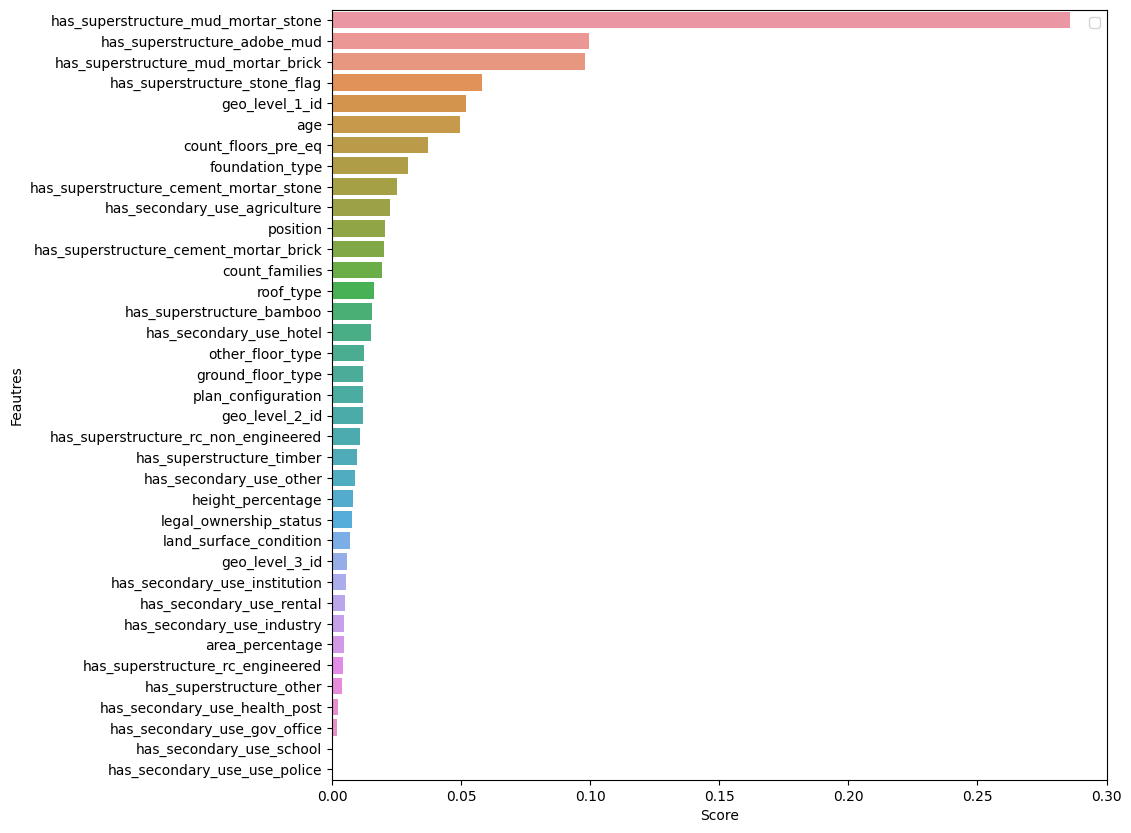

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(y="Feautres", x="Score", data=feature_imp_df)
plt.yticks(rotation=0)
plt.legend()

There is two features "has_secondary_use_school" and "has_secondary_use_use_police" which are not really importance to train XGB classifier. So we will remove these two columns and check acucuracy.

In [71]:
X_train[0], x_sm.columns


(array([0.33333333, 0.1058164 , 0.61454603, 0.25      , 0.25      ,
        0.21428571, 0.875     , 1.        , 0.5       , 0.5       ,
        0.75      , 0.33333333, 0.        , 0.22222222, 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.66666667, 0.11111111, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
        'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
        'land_surface_condition', 'foundation_type', 'roof_type',
        'ground_floor_type', 'other_floor_type', 'position',
        'plan_configuration', 'has_superstructure_adobe_mud',
        'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
        'has_superstructure_cement_mortar_stone',
        'has_superstructure_mud

In [72]:
# Remove has_secondary_use_school, has_secondary_use_use_police columns with their index value
columns_indices_to_remove = [-6, -2]
X_train1 = np.delete(X_train, columns_indices_to_remove, axis=1)
X_test1 = np.delete(X_test, columns_indices_to_remove, axis=1)


Now we will again train XGB model

In [73]:
# initialized model 
xgb1 = XGBClassifier()

# train the model
xgb1.fit(X_train1,y_train_binary)

# prediction
test_pred = xgb1.predict(X_test1)
train_pred = xgb1.predict(X_train1)

# Calculate accuracy 
xgb_test_acc1 = accuracy_score(y_test_binary, test_pred)
xgb_train_acc1 = accuracy_score(y_train_binary, train_pred)
rf_precision1 = precision_score(y_test, test_pred, average="macro")
rf_recall1 = recall_score(y_test, test_pred, average="macro")



# Print accuracies 
print(f"Train accuracy for XGB {xgb_test_acc1}")
print(f"Test accuracy for XGB {xgb_train_acc1}")
print(f"Precision score: {rf_precision1}")
print(f"Recall score: {rf_recall1}")
print("----------------------------------")
print(f"Classification Report: \n {classification_report(y_test_binary, test_pred)}")
print("---------------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test_binary,test_pred)}")

Train accuracy for XGB 0.7827667452036351
Test accuracy for XGB 0.7926161953884079
Precision score: 0.07005122646918127
Recall score: 0.06823755120881657
----------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     34662
           1       0.71      0.73      0.72     34662
           2       0.77      0.73      0.75     34661

    accuracy                           0.78    103985
   macro avg       0.78      0.78      0.78    103985
weighted avg       0.78      0.78      0.78    103985

---------------------------------
Confusion matrix: 
 [[30710  2939  1013]
 [ 2855 25285  6522]
 [ 1723  7537 25401]]


In [74]:
score = xgb1.feature_importances_
feature_name = x_sm.drop(columns=["has_secondary_use_school", "has_secondary_use_use_police"]).columns

xgb_feature_imp_df = pd.DataFrame({"Feautres": feature_name, "Score": score})
xgb_feature_imp_df = xgb_feature_imp_df.sort_values(by="Score", ascending=False ,ignore_index=True)

xgb_feature_imp_df

Feautres     Score
0      has_superstructure_mud_mortar_stone  0.285936
1             has_superstructure_adobe_mud  0.099435
2      has_superstructure_mud_mortar_brick  0.097824
3            has_superstructure_stone_flag  0.057899
4                           geo_level_1_id  0.052002
5                                      age  0.049403
6                      count_floors_pre_eq  0.037048
7                          foundation_type  0.029436
8   has_superstructure_cement_mortar_stone  0.025123
9            has_secondary_use_agriculture  0.022325
10                                position  0.020301
11  has_superstructure_cement_mortar_brick  0.020186
12                          count_families  0.019277
13                               roof_type  0.016307
14               has_superstructure_bamboo  0.015390
15                 has_secondary_use_hotel  0.015188
16                        other_floor_type  0.012419
17                       ground_floor_type  0.011900
18                      plan_configuration  0.011853
19                          geo_level_2_id  0.011833
20    has_superstructure_rc_non_engineered  0.010610
21               has_superstructure_timber  0.009448
22                 has_secondary_use_other  0.008921
23                       height_percentage  0.008049
24                  legal_ownership_status  0.007576
25                  land_surface_condition  0.007056
26                          geo_level_3_id  0.005795
27           has_secondary_use_institution  0.005181
28                has_secondary_use_rental  0.004892
29              has_secondary_use_industry  0.004673
30                         area_percentage  0.004490
31        has_superstructure_rc_engineered  0.004297
32                has_superstructure_other  0.003712
33           has_secondary_use_health_post  0.002371
34            has_secondary_use_gov_office  0.001842

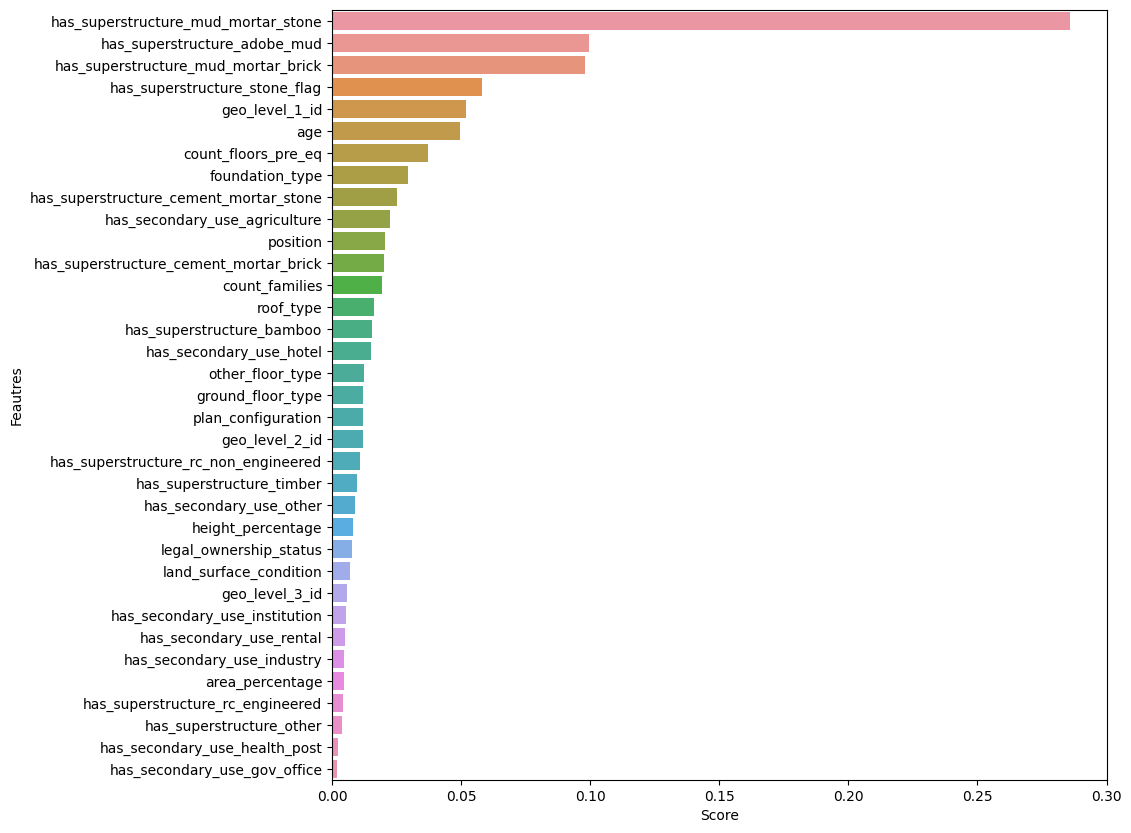

In [75]:

plt.figure(figsize=(10,10))
sns.barplot(y="Feautres", x="Score", data=xgb_feature_imp_df)
plt.yticks(rotation=0)
plt.show()

#### **LightGBM**

In [76]:
lightgbm_clf = lgb.LGBMClassifier(random_state=4)

# train the model
lightgbm_clf.fit(X_train,y_train)

# prediction
test_pred = lightgbm_clf.predict(X_test)
train_pred = lightgbm_clf.predict(X_train)

# Calculate accuracy 
lightgbm_test_acc = accuracy_score(y_test, test_pred)
lightgbm_train_acc = accuracy_score(y_train, train_pred)
lightgbm_precision = precision_score(y_test, test_pred, average="macro")
lightgbm_recall = recall_score(y_test, test_pred, average="macro")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 311953, number of used features: 37
[LightGBM] [Info] Start training from score -1.098615
[LightGBM] [Info] Start training from score -1.098615
[LightGBM] [Info] Start training from score -1.098606


In [77]:
print(f"Train accuracy for LightGBM  {lightgbm_test_acc}")
print(f"Test accuracy for LightGBM {lightgbm_train_acc}")
print(f"Precision score: {lightgbm_precision}")
print(f"Recall score: {lightgbm_recall}")

print("----------------------------------")
print(f"Classification Report: \n {classification_report(y_test, test_pred)}")
print("---------------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test,test_pred)}")

Train accuracy for LightGBM  0.7600423137952589
Test accuracy for LightGBM 0.7625539744769244
Precision score: 0.7598284039250055
Recall score: 0.7600419268012231
----------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.85      0.87      0.86     34662
           2       0.68      0.69      0.69     34662
           3       0.74      0.72      0.73     34661

    accuracy                           0.76    103985
   macro avg       0.76      0.76      0.76    103985
weighted avg       0.76      0.76      0.76    103985

---------------------------------
Confusion matrix: 
 [[30030  3432  1200]
 [ 3264 24054  7344]
 [ 1929  7783 24949]]


### **Catboost Classifier**

In [78]:
import catboost as cb

# initialized model 
cb_clf = cb.CatBoostClassifier(loss_function="MultiClass",eval_metric='Accuracy', random_state=4)

# train the model
cb_clf.fit(X_train,y_train_binary)

# prediction
test_pred = cb_clf.predict(X_test)
train_pred = cb_clf.predict(X_train)

# Calculate accuracy 
cb_test_acc = accuracy_score(y_test_binary, test_pred)
cb_train_acc = accuracy_score(y_train_binary, train_pred)
cb_precision = precision_score(y_test, test_pred, average="macro")
cb_recall = recall_score(y_test, test_pred, average="macro")

Learning rate set to 0.106053
0:	learn: 0.5941985	total: 292ms	remaining: 4m 51s
1:	learn: 0.6227701	total: 436ms	remaining: 3m 37s
2:	learn: 0.6310694	total: 620ms	remaining: 3m 26s
3:	learn: 0.6259565	total: 706ms	remaining: 2m 55s
4:	learn: 0.6283959	total: 808ms	remaining: 2m 40s
5:	learn: 0.6309572	total: 926ms	remaining: 2m 33s
6:	learn: 0.6361984	total: 1.03s	remaining: 2m 26s
7:	learn: 0.6309957	total: 1.12s	remaining: 2m 19s
8:	learn: 0.6371793	total: 1.24s	remaining: 2m 16s
9:	learn: 0.6417826	total: 1.35s	remaining: 2m 13s
10:	learn: 0.6438213	total: 1.46s	remaining: 2m 10s
11:	learn: 0.6445715	total: 1.55s	remaining: 2m 8s
12:	learn: 0.6473828	total: 1.72s	remaining: 2m 10s
13:	learn: 0.6479918	total: 1.89s	remaining: 2m 13s
14:	learn: 0.6500146	total: 2.01s	remaining: 2m 12s
15:	learn: 0.6532587	total: 2.15s	remaining: 2m 12s
16:	learn: 0.6548519	total: 2.29s	remaining: 2m 12s
17:	learn: 0.6564995	total: 2.42s	remaining: 2m 12s
18:	learn: 0.6582754	total: 2.55s	remaining: 

In [79]:
# Print accuracy matrics 
print(f"Train accuracy for XGB {cb_train_acc}")
print(f"Test accuracy for XGB {cb_test_acc}")
print(f"Precision score: {cb_precision}")
print(f"Recall score: {cb_recall}")
print("----------------------------------")
print(f"Classification Report: \n {classification_report(y_test_binary, test_pred)}")
print("---------------------------------")
print(f"Confusion matrix: \n {confusion_matrix(y_test_binary,test_pred)}")

Train accuracy for XGB 0.7896157433972425
Test accuracy for XGB 0.7818820022118574
Precision score: 0.06840712447025799
Recall score: 0.0664199988459985
----------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     34662
           1       0.71      0.73      0.72     34662
           2       0.77      0.73      0.75     34661

    accuracy                           0.78    103985
   macro avg       0.78      0.78      0.78    103985
weighted avg       0.78      0.78      0.78    103985

---------------------------------
Confusion matrix: 
 [[30649  2895  1118]
 [ 2972 25376  6314]
 [ 1737  7645 25279]]


Feature Importance for CatBoost classifier

In [80]:
imp_score = cb_clf.feature_importances_
feature_name = x_sm.columns

cb_feature_imp_df = pd.DataFrame({"Feature": feature_name, "Score":imp_score})
cb_feature_imp_df = cb_feature_imp_df.sort_values(by="Score", ascending=False, ignore_index=True)
cb_feature_imp_df

Feature      Score
0                           geo_level_1_id  26.189352
1                                      age  19.531081
2      has_superstructure_mud_mortar_stone  11.006016
3                           geo_level_2_id  10.821554
4                           geo_level_3_id   3.616540
5                          foundation_type   2.651761
6                      count_floors_pre_eq   2.621048
7                        ground_floor_type   2.457089
8                         other_floor_type   2.223757
9             has_superstructure_adobe_mud   1.951009
10                       height_percentage   1.704671
11                               roof_type   1.697977
12  has_superstructure_cement_mortar_brick   1.407203
13                         area_percentage   1.371515
14     has_superstructure_mud_mortar_brick   1.359873
15                                position   1.352012
16               has_superstructure_timber   1.311351
17                          count_families   1.083074
18           has_superstructure_stone_flag   1.058018
19                  land_surface_condition   0.946998
20                      plan_configuration   0.786440
21           has_secondary_use_agriculture   0.636482
22               has_superstructure_bamboo   0.555873
23    has_superstructure_rc_non_engineered   0.482188
24                  legal_ownership_status   0.347270
25  has_superstructure_cement_mortar_stone   0.247237
26                 has_secondary_use_hotel   0.173875
27        has_superstructure_rc_engineered   0.164951
28                has_superstructure_other   0.139595
29                 has_secondary_use_other   0.061621
30                has_secondary_use_rental   0.030913
31              has_secondary_use_industry   0.006269
32           has_secondary_use_institution   0.003685
33           has_secondary_use_health_post   0.000923
34            has_secondary_use_gov_office   0.000460
35                has_secondary_use_school   0.000263
36            has_secondary_use_use_police   0.000060

### Model comparison

For train and test accuracy

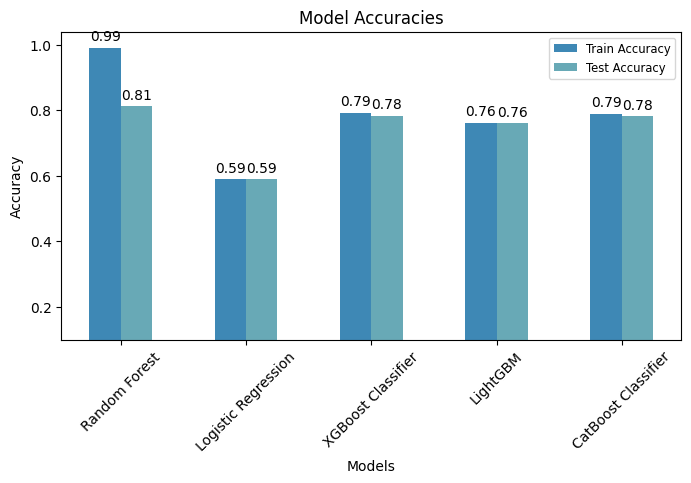

In [81]:
Models = ["Random Forest", "Logistic Regression", "XGBoost Classifier", "LightGBM", "CatBoost Classifier"]

train_acuracy = [rf_train_acc, lr_train_acc, xgb_train_acc1, lightgbm_train_acc, cb_train_acc]
test_accuracy = [rf_test_acc, lr_test_acc, xgb_test_acc1, lightgbm_test_acc, cb_test_acc]

bar_width = 0.25
index = np.arange(len(Models))

fig, ax = plt.subplots(figsize=(8,4))

train_bars = ax.bar(index, train_acuracy, bar_width, label='Train Accuracy', color='#3e88b5')
test_bars = ax.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy', color='#68a9b6')



# Function to annotate bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# Annotate train bars
annotate_bars(train_bars)

# Annotate test bars
annotate_bars(test_bars)


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Models)
ax.legend(fontsize='small',bbox_to_anchor=(1, 1))
ax.set_ylim(0.1)

plt.xticks(rotation=45)
plt.show()


For Precision and Recall score

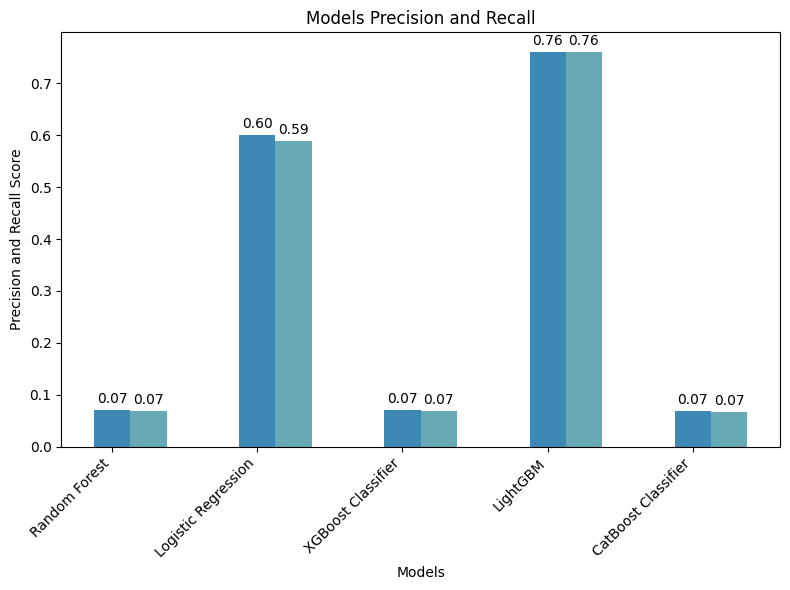

In [84]:
Models = ["Random Forest", "Logistic Regression", "XGBoost Classifier", "LightGBM", "CatBoost Classifier"]
Precision = [rf_precision1, lr_precision, xgb_precision, lightgbm_precision, cb_precision]
Recall = [rf_recall1, lr_recall, xgb_recall, lightgbm_recall, cb_recall]


bar_width = 0.25
index = np.arange(len(Models))

fig, ax = plt.subplots(figsize=(8,6))

precision_bars = ax.bar(index, Precision, bar_width, label='Precision', color='#3e88b5')
recall_bars = ax.bar(index + bar_width, Recall, bar_width, label='Recall', color='#68a9b6')



# Function to annotate bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# Annotate train bars
annotate_bars(precision_bars)

# Annotate test bars
annotate_bars(recall_bars)



ax.set_xlabel('Models')
ax.set_ylabel('Precision and Recall Score')
ax.set_title('Models Precision and Recall')
ax.set_xticks(index)
ax.set_xticklabels(Models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Out of the models evaluated, including Random Forest, Logistic Regression, XGBoost Classifier, LightGBM, and CatBoost Classifier, the LightGBM classifier model exhibited the highest accuracy and the precision and Recall score is also good, making it the most promising candidate for the task at hand.

LightGBM outperformed its counterparts in terms of accuracy on both the training and testing datasets. Its superior accuracy indicates its ability to effectively capture patterns and generalize well to unseen data. 

Based on the comprehensive evaluation of accuracy and Precision and recall score, the LightGBM Classifier emerges as the preferred choice for the given task. Its superior performance underscores its efficacy in accurately predicting outcomes while minimizing errors. By selecting LightGBM as the final model, we can have confidence in its ability to deliver reliable predictions and contribute to the success of the project.

#### **Saving Catboost Classifier Model**

In [85]:
model_directory = "D:/Internship/Rubixe/Earthquake-Damage-Prediction/Model"
model_filename = "Lightgbm_classifier.pkl"

model_filepath = os.path.join(model_directory, model_filename)

pickle.dump(lightgbm_clf, open(model_filepath, 'wb'))

with open(model_filepath, "rb") as file:
    load_model = pickle.load(file)

In [86]:
# check type of model
print(type(load_model))

<class 'lightgbm.sklearn.LGBMClassifier'>


#  Data Analysis Report


Introduction: The goal of this data analysis report is to provide insights and findings from a machine learning project to obtain the level of damage to building caused by the 2015 Gorkha earthquake in Nepal based on the aspects of building location and construction. 

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

Data Description: The dataset used for this project contains information related to Gorkha earthquake and includes the following attributes:

- geo_level_1_id, geo_level_2_id, geo_level_3_id : geographic region in which building exists, from largest (level 1) to most specific sub-region (level  3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567. 
- count_floors_pre_eq : number of floors in the building before the earthquake. 
- age : age of the building in years. 
- area_percentage : normalized area of the building footprint. 
- height_percentage : normalized height of the building footprint. 
- land_surface_condition : surface condition of the land where the building was built. Possible values: n, o, t. 
- foundation_type : type of foundation used while building. Possible values: h, i, r, u, w. 
- roof_type : type of roof used while building. Possible values: n, q, x. 
- ground_floor_type : type of the ground floor. Possible values: f, m, v, x, z. 
- other_floor_type : type of constructions used in higher than the ground floors (except of roof). Possible values: j, q,s,x. 
- position : position of the building. Possible values: j, o, s, t. 
- plan_configuration : building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u. 
- has_superstructure_adobe_mud : flag variable that indicates if the superstructure was made of Adobe/Mud. 
- has_superstructure_mud_mortar_stone : flag variable that indicates if the superstructure was made of Mud Mortar - Stone. 
- has_superstructure_stone_flag : flag variable that indicates if the superstructure was made of Stone. 
- has_superstructure_cement_mortar_stone : flag variable that indicates if the superstructure was made of Cement Mortar - Stone. 
- has_superstructure_mud_mortar_brick : flag variable that indicates if the superstructure was made of Mud Mortar - Brick. 
- has_superstructure_cement_mortar_brick : flag variable that indicates if the superstructure was made of Cement Mortar - Brick. 
- has_superstructure_timber : flag variable that indicates if the superstructure was made of Timber. 
- has_superstructure_bamboo : flag variable that indicates if the superstructure was made of Bamboo. 
- has_superstructure_rc_non_engineered : flag variable that indicates if the superstructure was made of non-engineered reinforced concrete. 
- has_superstructure_rc_engineered : flag variable that indicates if the superstructure was made of engineered reinforced concrete. 
- has_superstructure_other : flag variable that indicates if the superstructure was made of any other material. 
- legal_ownership_status : legal ownership status of the land where building was built. Possible values: a, r, v, w. 
- count_families : number of families that live in the building. 
- has_secondary_use : flag variable that indicates if the building was used for any secondary purpose. 
- has_secondary_use_agriculture : flag variable that indicates if the building was used for agricultural purposes. 
- has_secondary_use_hotel : flag variable that indicates if the building was used as a hotel. 
- has_secondary_use_rental : flag variable that indicates if the building was used for rental purposes. 
- has_secondary_use_institution : flag variable that indicates if the building was used as a location of any institution. 
- has_secondary_use_school : flag variable that indicates if the building was used as a school. 
- has_secondary_use_industry : flag variable that indicates if the building was used for industrial purposes. 
- has_secondary_use_health_post : flag variable that indicates if the building was used as a health post. 
- has_secondary_use_gov_office : flag variable that indicates if the building was used for a government office. 
- has_secondary_use_use_police : flag variable that indicates if the building was used as a police station. 
- has_secondary_use_other : flag variable that indicates if the building was secondarily used for other purposes.

**1. Data Analysis Steps:**
- Check for missing values.
- Check descriptive analysis like count, mean, std, min, percentile, max.
- Check duplicates.
- Converting categorical values to numerical values

**2. Exploratory Data Analysis (EDA):**
- Conducted univariate analysis to understand the distribution of individual features.
- Visualized relationships between features using scatter plots, histograms, and correlation matrices to identify patterns and dependencies.
- Investigated the distribution of the target variable (damage grade) to understand class balance.

**3. Data Cleaning and Preprocessing and Feature Engineering:**
- Examined the distribution of each feature to identify outliers and remove them.
- scaling data into Min Max Scaler.
- Balancing data distribution using smote method.
- Remove Multicolinearity


**4. Model Building and Evaluation:**
- Split the dataset into training and testing sets 75/25 ratio.
- Implemented various machine learning algorithms such as logistic regression, random forest, XGBoost, LightGBM and CatBoost classifier Earth quake Damage Prediction.
- Evaluated models using metrics such as accuracy, precision, recall, F1-score to assess predictive performance.

**5. Model Interpretation and Validation:**
- Interpreted model results to understand which features are most influential in preventing damages occurring in an earthquake as severe as Gorkha earthquake.

#### Challenges faced:

Managing a large number of columns and conducting extensive preprocessing presented significant challenges in this project. The sheer volume of data required meticulous handling to ensure accuracy and reliability in the analysis. 

Preprocessing tasks such as feature scaling, handling missing values, and encoding categorical variables demanded considerable time and computational resources. Additionally, the diversity and complexity of the data necessitated careful consideration of feature selection techniques to identify relevant predictors for model development. Despite these challenges, thorough preprocessing was essential to ensure the robustness and effectiveness of the predictive models.

## Results and Insights:
- Identified key factors contributing to damages during an earthquake. 
- Achieved a predictive model with satisfactory performance metrics, indicating the potential for life-saving application.
- This model can be used in improving early warning systems, risk assessment and disaster preparedness strategies
- By using LightGBM Classifier model we get 76% highest accuracy with good precision and recall score.


**Conclusion:** In conclusion, this data analysis report outlines the process of developing a machine learning model for Earthquake damage detection. By analyzing and interpreting this post-disaster dataset, valuable insights have been gained that can aid in early detection and proper way to decrease damages caused due to Earthquake.


## **Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings**

To reduce the likelihood of significant damage in buildings caused by earthquakes, seismologists could provide the following suggestions:

- Early Warning Systems: Develop and deploy robust early warning systems capable of detecting seismic activity and issuing timely alerts to at-risk populations. These systems can provide crucial seconds to minutes of advance notice, allowing people to take protective actions and evacuate buildings before the shaking begins.
- Public Education and Awareness: Launch extensive public education campaigns to raise awareness about earthquake preparedness and safety measures. Educate individuals, communities, and businesses on how to secure furniture, create evacuation plans, and assemble emergency kits containing essential supplies.
- Building Codes and Standards: Advocate for the enforcement of stringent building codes and standards that prioritize earthquake-resistant construction techniques and materials. Encourage retrofitting and reinforcement of existing buildings to enhance their resilience to seismic forces.
- Site-Specific Risk Assessments: Conduct thorough site-specific risk assessments to identify areas prone to liquefaction, landslides, and other secondary hazards triggered by earthquakes. Implement zoning regulations and land-use planning measures to restrict development in high-risk zones and protect critical infrastructure.
- Seismic Retrofitting: Promote the retrofitting of vulnerable structures, particularly schools, hospitals, and essential lifeline infrastructure, to improve their ability to withstand seismic shaking. Offer financial incentives and technical assistance programs to facilitate retrofitting efforts, especially in low-income and high-risk areas.
- Community Resilience Programs: Foster community resilience through capacity-building initiatives, such as community-based disaster preparedness training, neighborhood drills, and the establishment of community emergency response teams. Empower local residents to take proactive measures to safeguard their homes and neighborhoods.
- Infrastructure Lifelines: Strengthen the resilience of lifeline infrastructure systems, including water supply networks, power grids, transportation networks, and communication systems, to minimize disruption and facilitate rapid recovery following an earthquake. Incorporate redundancy, robustness, and post-earthquake recovery plans into infrastructure design and planning.
- International Collaboration: Foster collaboration and knowledge-sharing among seismologists, engineers, policymakers, and emergency responders at the national, regional, and international levels. Pool resources, expertise, and best practices to develop innovative solutions for earthquake risk reduction and resilience-building efforts.
- Research and Innovation: Invest in research and innovation to advance earthquake science, engineering, and technology. Support interdisciplinary research initiatives aimed at understanding earthquake processes, developing predictive models, and designing innovative mitigation strategies.
Continuous Monitoring and Evaluation: Establish a comprehensive monitoring and evaluation framework to assess the effectiveness of earthquake risk reduction measures over time. Monitor changes in seismic activity, building vulnerability, and community resilience indicators to inform adaptive management and policy decisions.